# Sales - train data

In [ ]:
import pandas as pd
import numpy as np

# 加载数据
try:
    df_raw = pd.read_csv('ruc_Class25Q2_train_price.csv')
except Exception as e:
    print(f"加载数据失败: {e}. 请检查文件路径和名称。")

df = df_raw.copy()

# data analysis
print("--- 1. 数据形状 (Shape) ---")
print(f"行数 (样本数): {df.shape[0]}, 列数 (特征数): {df.shape[1]}")

print("\n--- 2. 数据信息和缺失值概览 (Info) ---")
# 检查数据类型和非空值数量
print(df.info(verbose=True))

--- 1. 数据形状 (Shape) ---
行数 (样本数): 103871, 列数 (特征数): 55

--- 2. 数据信息和缺失值概览 (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103871 entries, 0 to 103870
Data columns (total 55 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   城市         103871 non-null  int64  
 1   区域         103871 non-null  float64
 2   板块         103871 non-null  float64
 3   环线         40419 non-null   object 
 4   Price      103871 non-null  float64
 5   房屋户型       103291 non-null  object 
 6   所在楼层       103871 non-null  object 
 7   建筑面积       103871 non-null  object 
 8   套内面积       35984 non-null   object 
 9   房屋朝向       103870 non-null  object 
 10  建筑结构       103291 non-null  object 
 11  装修情况       103291 non-null  object 
 12  梯户比例       101252 non-null  object 
 13  配备电梯       91520 non-null   object 
 14  别墅类型       1443 non-null    object 
 15  交易时间       103871 non-null  object 
 16  交易权属       103871 non-null  object 
 17  上次交易       78422 non

C:\Users\lshte\AppData\Local\Temp\ipykernel_28892\3601915168.py:6: DtypeWarning: Columns (3,32,34,43,46,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('ruc_Class25Q2_train_price.csv')



--- 4. 目标变量 Price 统计描述 ---
count    1.038710e+05
mean     2.262366e+06
std      2.532925e+06
min      7.455330e+04
25%      8.910913e+05
50%      1.479407e+06
75%      2.680757e+06
max      5.622643e+07
Name: Price, dtype: float64

--- 5. 目标变量 Price 异常值检查 (使用 IQR) ---
低于下限 (-1793407.31) 或高于上限 (5365255.64) 的异常值数量: 7823
异常值占总样本比例: 7.53%


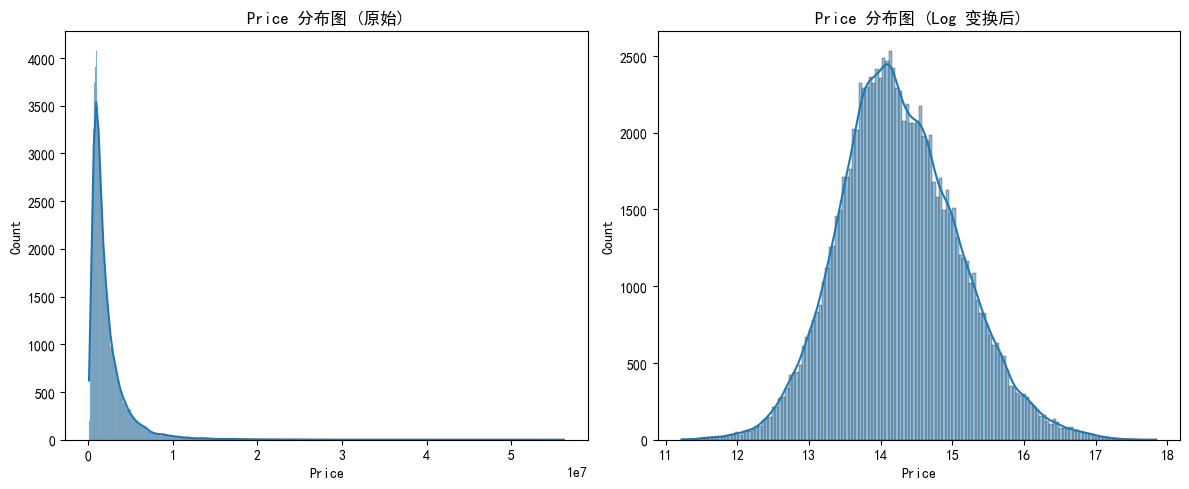

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
# 目标变量分析
Y_COL = 'Price'

print(f"\n--- 4. 目标变量 {Y_COL} 统计描述 ---")
print(df[Y_COL].describe())

# 可视化 (如果您的环境支持)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[Y_COL], kde=True)
plt.title(f'{Y_COL} 分布图 (原始)')

# 检查是否有异常值 (基于 Z-score 或 IQR)
print(f"\n--- 5. 目标变量 {Y_COL} 异常值检查 (使用 IQR) ---")
Q1 = df[Y_COL].quantile(0.25)
Q3 = df[Y_COL].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[Y_COL] < lower_bound) | (df[Y_COL] > upper_bound)]
print(f"低于下限 ({lower_bound:.2f}) 或高于上限 ({upper_bound:.2f}) 的异常值数量: {len(outliers)}")
print(f"异常值占总样本比例: {len(outliers) / len(df) * 100:.2f}%")

# 检查 Log 变换后的分布
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df[Y_COL]), kde=True)
plt.title(f'{Y_COL} 分布图 (Log 变换后)')

plt.tight_layout()
plt.show()

--- Log 变换后 (Log_Price) 的正态性检验 ---
偏度 (Skewness): 0.2411
峰度 (Kurtosis, Fisher): 0.1669


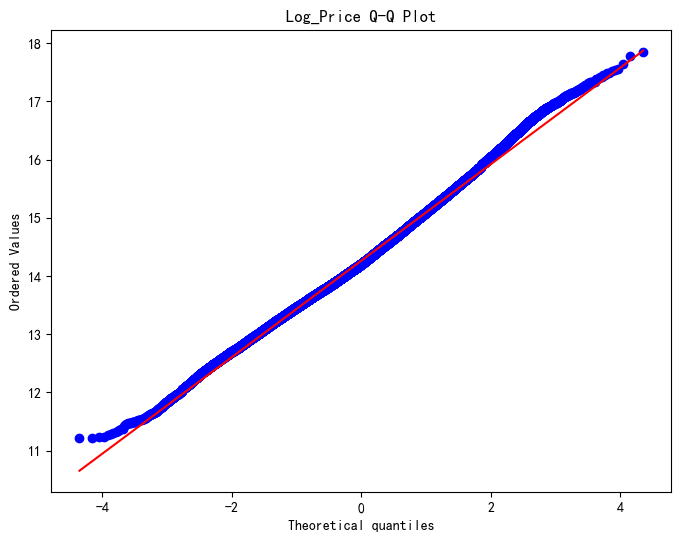


--- Kolmogorov-Smirnov 正态性检验 (KS Test) ---
KS 统计量: 0.0272
P-value: 3.288140241956014e-67
结论: P-value < 0.05，我们拒绝零假设。Log 变换后的数据在统计上**不严格服从**正态分布，但其分布已得到显著改善。


In [ ]:
from scipy.stats import skew, kurtosis, probplot

df['Log_Price'] = np.log1p(df[Y_COL])

Y_COL = 'Log_Price'

# 1. 计算偏度和峰度
log_price_skew = skew(df[Y_COL])
log_price_kurt = kurtosis(df[Y_COL]) # 默认计算 Fisher 峰度

print(f"--- Log 变换后 ({Y_COL}) 的正态性检验 ---")
print(f"偏度 (Skewness): {log_price_skew:.4f}")
print(f"峰度 (Kurtosis, Fisher): {log_price_kurt:.4f}")

# 2. 可视化检验：Q-Q Plot
plt.figure(figsize=(8, 6))
# probplot 函数用于生成 Q-Q 图
probplot(df[Y_COL], dist="norm", plot=plt)
plt.title(f'{Y_COL} Q-Q Plot')
plt.show()

# 3. 统计检验
# Shapiro-Wilk 检验：用于小样本（n < 50）
# Kolmogorov-Smirnov 或 Anderson-Darling 检验：用于大样本
from scipy.stats import kstest, norm

# 使用 Kolmogorov-Smirnov 检验 (KS 检验)
# 零假设 H0: 数据服从正态分布
# 如果 P-value < 0.05，则拒绝 H0，认为数据不服从正态分布
ks_statistic, ks_p_value = kstest(df[Y_COL], 'norm', args=(df[Y_COL].mean(), df[Y_COL].std()))

print(f"\n--- Kolmogorov-Smirnov 正态性检验 (KS Test) ---")
print(f"KS 统计量: {ks_statistic:.4f}")
print(f"P-value: {ks_p_value}")

if ks_p_value < 0.05:
    print("结论: P-value < 0.05，我们拒绝零假设。Log 变换后的数据在统计上**不严格服从**正态分布，但其分布已得到显著改善。")
else:
    print("结论: P-value >= 0.05，我们没有充分证据拒绝零假设，数据可能服从正态分布。")

In [ ]:
def simplified_redundancy_check(df, similarity_threshold=0.5):
    """
    检查数据类型相同的列对，计算相似度，并删除相似度高且缺失值更多的列。
    """
    columns = df.columns.tolist()
    cols_to_drop = set()
    
    # 获取所有列的数据类型，用于快速比较
    col_dtypes = df.dtypes.to_dict()

    print(f"开始检查列之间的相似性 (阈值: {similarity_threshold * 100:.0f}%) ...")
    print("-" * 40)
    
    # 第一重循环：遍历所有列
    for i in range(len(columns)):
        col1 = columns[i]
        
        # 跳过已经标记要删除的列
        if col1 in cols_to_drop:
            continue
            
        # 第二重循环：与 col1 后面的所有列进行比较
        for j in range(i + 1, len(columns)):
            col2 = columns[j]

            # 跳过已经标记要删除的列
            if col2 in cols_to_drop:
                continue

            # 1. 快速检查：如果两列的数据类型不同，直接跳过
            if col_dtypes[col1] != col_dtypes[col2]:
                continue

            # --- 计算相似度 ---
            
            # 筛选出两列都非缺失值的行
            both_not_na = df[[col1, col2]].dropna()
            
            if both_not_na.empty:
                similarity = 0.0
            else:
                # 计算值相同的行数
                matches = (both_not_na[col1] == both_not_na[col2]).sum()
                # 相似度 = 匹配数 / 共同非缺失值的总数
                similarity = matches / len(both_not_na)
                
            # 2. 判断是否超过阈值
            if similarity >= similarity_threshold:
                print(f"找到高度相似列对 ({col1} / {col2})，相似度: {similarity:.4f}")
                
                # 3. 决定删除哪一列 (删除缺失值更多的)
                missing_count1 = df[col1].isna().sum()
                missing_count2 = df[col2].isna().sum()

                if missing_count1 > missing_count2:
                    cols_to_drop.add(col1)
                    print(f"    -> 删除 '{col1}' (缺失值: {missing_count1})，保留 '{col2}' (缺失值: {missing_count2})")
                elif missing_count2 > missing_count1:
                    cols_to_drop.add(col2)
                    print(f"    -> 删除 '{col2}' (缺失值: {missing_count2})，保留 '{col1}' (缺失值: {missing_count1})")
                else:
                    # 缺失值数量相等，默认删除第二列
                    cols_to_drop.add(col2)
                    print(f"    -> 缺失值数量相等 ({missing_count1})，删除 '{col2}'，保留 '{col1}'")
            
    # --- 执行删除操作 ---
    cols_to_drop_list = list(cols_to_drop)
    
    if cols_to_drop_list:
        df_cleaned = df.drop(columns=cols_to_drop_list)
        print("\n--- 结果 ---")
        print(f"最终删除的冗余列: {cols_to_drop_list}")
        print(f"原DataFrame列数: {df.shape[1]}, 新DataFrame列数: {df_cleaned.shape[1]}")
    else:
        df_cleaned = df
        print("\n--- 结果 ---")
        print("未找到需要删除的冗余列。")

    return df_cleaned

# 调用函数进行处理，并将结果存储在新的 DataFrame 中
df = simplified_redundancy_check(df, similarity_threshold=0.9)

开始检查列之间的相似性 (阈值: 90%) ...
----------------------------------------
找到高度相似列对 (区域 / 区县)，相似度: 0.9820
    -> 删除 '区县' (缺失值: 7241)，保留 '区域' (缺失值: 0)
找到高度相似列对 (板块 / 板块_comm)，相似度: 0.9804
    -> 删除 '板块_comm' (缺失值: 7578)，保留 '板块' (缺失值: 0)
找到高度相似列对 (环线 / 环线位置)，相似度: 0.9979
    -> 删除 '环线位置' (缺失值: 75774)，保留 '环线' (缺失值: 63452)
找到高度相似列对 (lon / coord_x)，相似度: 0.9037
    -> 删除 'coord_x' (缺失值: 7131)，保留 'lon' (缺失值: 0)
找到高度相似列对 (lat / coord_y)，相似度: 0.9038
    -> 删除 'coord_y' (缺失值: 7131)，保留 'lat' (缺失值: 0)

--- 结果 ---
最终删除的冗余列: ['coord_x', '环线位置', 'coord_y', '板块_comm', '区县']
原DataFrame列数: 56, 新DataFrame列数: 51


In [ ]:
import torch
from transformers import pipeline

TEXT_COLUMNS = ['房屋优势', '核心卖点', '户型介绍', '周边配套', '交通出行', '客户反馈']

# 2. 情感分析模型路径（使用中文模型）
MODEL_NAME = "IDEA-CCNL/Erlangshen-RoBERTa-110M-Sentiment"

# 3. 性能优化参数
BATCH_SIZE = 64 # 批次越大，GPU 利用率越高，但需要更多显存
MAX_SEQ_LENGTH = 512 # 限制文本长度，防止模型输入超限

def initialize_sentiment_pipeline():
    """
    初始化情感分析 pipeline，自动检测并选择 GPU。
    """
    # 检查 CUDA 是否可用
    if torch.cuda.is_available():
        device_index = 0  # 默认使用第一块 GPU
        device_info = torch.cuda.get_device_name(device_index)
        print(f"✅ GPU 检测成功，使用设备: {device_info} (Index: {device_index})")
    else:
        device_index = -1  # 回退到 CPU
        print("⚠️ 未检测到可用 GPU，将使用 CPU 进行运算。")

    try:
        sentiment_pipeline = pipeline(
            "sentiment-analysis",
            model=MODEL_NAME, 
            tokenizer=MODEL_NAME,
            device=device_index
        )
        return sentiment_pipeline
    except Exception as e:
        print(f"❌ 情感分析模型加载失败: {e}")
        return None

def map_result_to_score(label, confidence):
    """
    将模型输出的标签和置信度映射到 0-10 的情绪评分。
    正面: [5, 10]，负面: [0, 5]，置信度为 0.5 时为 5 (中立)。
    """
    if label == 'positive':
        # 评分 = 5 + (置信度 * 5)
        score = 5 + (confidence * 5) 
    else: # negative
        # 评分 = 5 - (置信度 * 5)
        score = 5 - (confidence * 5)
    
    # 确保分数在 0 到 10 之间
    return max(0, min(10, score))


def process_and_score_column(df, column_name, sentiment_pipeline):
    """
    批量处理单个文本列，并将分数存入新列。
    """
    new_col_name = f'{column_name}_SentimentScore_0_10'
    
    # 1. 提取所有非缺失的文本，并记录索引
    # 必须确保处理的文本是非缺失值
    text_series = df[column_name].dropna()
    original_index = text_series.index
    text_list = text_series.astype(str).tolist()

    if not text_list:
        print(f"列 '{column_name}' 无有效文本，跳过。")
        df[new_col_name] = np.nan
        return df

    print(f"\n正在批量处理列: {column_name} ({len(text_list)} 条记录)...")
    
    try:
        # 2. 直接将列表传递给 pipeline 
        # truncation=True 确保文本不会超过模型最大长度
        results = sentiment_pipeline(
            text_list, 
            batch_size=BATCH_SIZE,  
            truncation=True
        ) 

        # 3. 解析结果并映射评分
        scores = [
            map_result_to_score(res['label'], res['score']) 
            for res in results
        ]

        # 4. 创建 Series 并使用原始索引，确保数据能回填到正确位置
        score_series = pd.Series(scores, index=original_index)
        df[new_col_name] = score_series
        
        print(f"✅ 列 '{column_name}' 转换完成。")

    except Exception as e:
        print(f"❌ 列 '{column_name}' 处理失败: {e}")
        df[new_col_name] = np.nan
        
    return df

# --- 主执行流程 ---
sentiment_pipeline = initialize_sentiment_pipeline()

if sentiment_pipeline:
    for col in TEXT_COLUMNS:
        df = process_and_score_column(df, col, sentiment_pipeline)

    print("\n所有文本列情绪评分转换完成。")
    print("\n转换后的部分数据示例 (仅显示分数非空行):")
    print(df[[col for col in df.columns if 'SentimentScore' in col] + ['核心卖点']].dropna().head())
else:
    print("无法进行情感分析，因为 pipeline 未成功初始化。")

c:\Users\lshte\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ GPU 检测成功，使用设备: NVIDIA GeForce RTX 5060 Laptop GPU (Index: 0)


Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



正在批量处理列: 房屋优势 (82635 条记录)...
✅ 列 '房屋优势' 转换完成。

正在批量处理列: 核心卖点 (85257 条记录)...
✅ 列 '核心卖点' 转换完成。

正在批量处理列: 户型介绍 (28771 条记录)...
✅ 列 '户型介绍' 转换完成。

正在批量处理列: 周边配套 (60733 条记录)...
✅ 列 '周边配套' 转换完成。

正在批量处理列: 交通出行 (60607 条记录)...
✅ 列 '交通出行' 转换完成。

正在批量处理列: 客户反馈 (103871 条记录)...
✅ 列 '客户反馈' 转换完成。

所有文本列情绪评分转换完成。

转换后的部分数据示例 (仅显示分数非空行):
    房屋优势_SentimentScore_0_10  核心卖点_SentimentScore_0_10  \
3                   1.704629                  0.043096   
6                   0.527096                  0.005339   
23                  2.002297                  0.007752   
26                  1.704629                  0.007261   
33                  0.635615                  0.015078   

    户型介绍_SentimentScore_0_10  周边配套_SentimentScore_0_10  \
3                   0.003341                  0.064239   
6                   0.007930                  0.010864   
23                  0.005463                  0.021614   
26                  0.008504                  0.012758   
33                  0.004650          

In [ ]:
# 预处理所在楼层，拆分为楼层位置和总楼层数
def split_floor_feature(df):
    if '所在楼层' not in df.columns:
        return df
        
    # 将 NaN 转换为字符串，以便进行 split 操作
    df['所在楼层'] = df['所在楼层'].astype(str)
    
    # 提取楼层位置 (括号前部分)
    df['楼层位置'] = df['所在楼层'].str.split(' ').str[0].str.strip()
    
    # 提取总楼层数
    df['总楼层数'] = df['所在楼层'].str.split(' ').str[1].str.strip()
    
    # 删除原始列
    df = df.drop(columns=['所在楼层'], errors='ignore')
    return df

df = split_floor_feature(df)

# 展示一下楼层位置和总楼层数的前几行数据
print("\n--- 楼层位置和总楼层数预处理结果预览 ---")
print(df[['楼层位置', '总楼层数']].head())


--- 楼层位置和总楼层数预处理结果预览 ---
  楼层位置    总楼层数
0  中楼层   (共5层)
1   顶层   (共6层)
2  低楼层   (共6层)
3   底层   (共2层)
4  中楼层  (共10层)


In [ ]:
import re
def split_house_layout(df):
    if '房屋户型' not in df.columns:
        return df

    # 1. 标准化：将所有“房间”替换为“室”
    # 使用 .loc 确保赋值安全
    # 先填充 NaN 为空字符串以保证 .str 链式操作稳定，这不会影响数字提取失败时得到的 NaN
    layout_series = df['房屋户型'].astype(str).str.replace('房间', '室', regex=False).fillna('')
    
    # 定义要提取的户型部分及其对应的列名
    layout_parts = {
        '室': 'Num_Rooms',
        '厅': 'Num_Halls',
        '厨': 'Num_Kitchens',
        '卫': 'Num_Bathrooms'
    }
    
    # 2. 和 3. 提取数字并创建新列
    for part, col_name in layout_parts.items():
        # 正则表达式: 匹配数字 (\d+) 紧跟着 part (例如: '室')
        
        # 关键修正：确保提取到的结果直接通过 pd.to_numeric 转换为 float，
        # 这样无法提取或原始为 NaN/空字符串的条目都会得到 NaN (float)
        extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0] 
        
        # 使用 pd.to_numeric(errors='coerce') 将所有非数字的提取结果（包括 NaN）转为 NaN float
        df.loc[:, col_name] = pd.to_numeric(extracted_num_str, errors='coerce')
        # NaN 将被保留，交给 ColumnTransformer 中的 Imputer 处理
    
    # 4. 删除原始列
    df = df.drop(columns=['房屋户型'], errors='ignore')
    return df

df = split_house_layout(df)
print("\n--- 房屋户型预处理结果预览 ---")
print(df[['Num_Rooms', 'Num_Halls', 'Num_Kitchens', 'Num_Bathrooms']].head(10))

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lshte\AppData\Local\Temp\ipykernel_28892\3952108520.py:25: SyntaxWarning: invalid escape sequence '\d'
  extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0]



--- 房屋户型预处理结果预览 ---
   Num_Rooms  Num_Halls  Num_Kitchens  Num_Bathrooms
0        2.0        1.0           1.0            1.0
1        3.0        1.0           1.0            1.0
2        3.0        2.0           1.0            2.0
3        6.0        3.0           1.0            3.0
4        1.0        NaN           NaN            1.0
5        5.0        2.0           1.0            4.0
6        3.0        2.0           1.0            2.0
7        NaN        NaN           NaN            NaN
8        3.0        1.0           1.0            2.0
9        5.0        3.0           1.0            4.0


In [ ]:
# --- 新增特征工程函数：创建“南北通透”特征 ---
def create_north_south_feature(df):
    if '房屋朝向' not in df.columns:
        # 如果原始列不存在，则创建全为 0 的新列，并返回
        df.loc[:, '南北通透'] = 0
        return df

    # 将朝向转换为大写字符串以确保匹配鲁棒性
    orientation_series = df['房屋朝向'].astype(str).str.upper().fillna('')
    
    # 判断是否同时包含“南”和“北”
    # .str.contains() 使用了正则表达式的 lookahead (?=.*) 来确保两个条件都在字符串中
    is_north_south = (
        orientation_series.str.contains('南', regex=False) & 
        orientation_series.str.contains('北', regex=False)
    )
    
    # 创建新列，True -> 1, False -> 0
    df.loc[:, '南北通透'] = is_north_south.astype(int)
    
    # 删除原始列
    df = df.drop(columns=['房屋朝向'], errors='ignore')
    return df

df = create_north_south_feature(df)
print("\n--- 南北通透特征预处理结果预览 ---")
print(df[['南北通透']].head(10))


--- 南北通透特征预处理结果预览 ---
   南北通透
0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     1
8     0
9     1


In [ ]:
from datetime import datetime

# 假设您的DataFrame已经加载并命名为 df
# df = pd.read_csv('ruc_Class25Q2_train_price.csv')

def fill_house_age(row):
    """
    根据 '上次交易' 和 '交易时间' 的日期差，填充 '房屋年限' 缺失值。
    """
    # 1. 如果房屋年限本身不缺失，则直接返回现有值
    if pd.notna(row['房屋年限']):
        return row['房屋年限']

    # 2. 如果房屋年限缺失，检查日期列是否缺失
    if pd.isna(row['上次交易']) or pd.isna(row['交易时间']):
        # 如果日期列缺失，则无法计算，返回缺失值
        return row['房屋年限']

    try:
        # 3. 转换日期格式 (确保格式正确，这里假设是 YYYY-MM-DD)
        # 注意：如果您的原始数据日期格式不是 YYYY-MM-DD，请根据实际情况修改
        start_date = pd.to_datetime(row['上次交易'])
        end_date = pd.to_datetime(row['交易时间'])

        # 4. 计算时间差（以年为单位的近似值）
        time_delta_days = (end_date - start_date).days
        time_delta_years = time_delta_days / 365.25 # 使用365.25考虑闰年

        # 5. 根据时间差进行分类填充
        if time_delta_years >= 5:
            return '满五年'
        elif time_delta_years >= 2:
            return '满二年'
        else:
            return '未满两年'

    except Exception as e:
        # 如果日期转换或计算过程中出现错误（如格式不规范），返回缺失值
        # print(f"Error processing row: {e}")
        return row['房屋年限']

# 应用函数到DataFrame的每一行，只对缺失值进行处理
# 为了效率，我们只对需要处理的行应用函数
missing_age_df = df[df['房屋年限'].isna()]
df.loc[missing_age_df.index, '房屋年限'] = missing_age_df.apply(fill_house_age, axis=1)

# 打印填充后的缺失值数量进行检查
print("填充后 '房屋年限' 的缺失值数量:", df['房屋年限'].isna().sum())
print("\n填充后的部分数据（房屋年限非缺失值）:")

填充后 '房屋年限' 的缺失值数量: 25464

填充后的部分数据（房屋年限非缺失值）:


In [ ]:
import re

def parse_chinese_number(cn_num_str):
    """
    将中文数字字符串转换为阿拉伯数字。
    支持：一到十、二十、一百零四等形式的三位数。
    """
    if cn_num_str.isdigit():
        return int(cn_num_str)
    
    text = str(cn_num_str).strip()
    if text.isdigit():
        return int(text)

    cn_map = {
        '零': 0, '一': 1, '二': 2, '两': 2, '三': 3, '四': 4,
        '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,
    }
    
    unit_map = {'十': 10, '百': 100}
    
    num = 0
    current_unit = 1 # 当前位的权重 (个位是1, 十位是10, 百位是100)
    current_digit = 0
    
    # 从后往前遍历字符串，简化处理逻辑
    for char in reversed(text):
        if char in cn_map:
            current_digit = cn_map[char]
            if current_digit == '零':
                continue
            # 如果是数字（个位数），直接加到 num 上
            if current_unit == 1: 
                num += current_digit
            # 否则，它可能是 "一" "百" 或 "一" "十" 这样的
            else: 
                num += current_digit * current_unit
        elif char in unit_map:
            # 遇到单位 (十/百)
            current_unit = unit_map[char]
            # 特殊处理 "十" 开头的数字，如 "十三"
            if char == '十' and num < 10 and num > 0: 
                num += 10
            # 重置 current_unit 权重，但不在当前循环加值
            pass 
        else:
            # 遇到无法识别的字符，返回 None
            return None

    # 修正纯 "十" 的情况（如“十”，被处理成10）
    if text == '十':
        return 10
        
    # 修正只有单位的情况（如“百”）
    if num == 0 and any(unit in text for unit in unit_map):
         # 检查是否是纯单位，这在标准数字中不合法，但为了保险返回 None
         return None 
         
    return num

def convert_tihu_ratio_robust(tihu_str):
    """
    将中文描述的“梯户比例”转换为数值比值 (户数 / 梯数)，
    支持复杂的中文数字解析。
    """
    if pd.isna(tihu_str) or not isinstance(tihu_str, str):
        return None

    text = str(tihu_str).strip().replace(" ", "").upper() # 统一转大写，因为解析函数是小写，这里用大写更保险

    # 正则模式：匹配 [数字或中文数字]梯[数字或中文数字]户
    # 这里的中文数字需要涵盖所有可能的一位数和两位数
    cn_pattern = r'(\d+|[零一二两三四五六七八九十百]+)梯(\d+|[零一二两三四五六七八九十百]+)户'
    match = re.search(cn_pattern, text)

    if match:
        
        # 简化处理：对于 "一梯两户" (已经匹配成功)，直接用 parse_chinese_number
        ladder = parse_chinese_number(match.group(1))
        household = parse_chinese_number(match.group(2))

        if ladder is not None and household is not None and ladder > 0:
            return ladder / household
        
    return None

# 应用转换函数到“梯户比例”列
df['梯户比例_Ratio_Robust'] = df['梯户比例'].apply(convert_tihu_ratio_robust)

# 打印转换结果的前几行和统计信息
print("原始 '梯户比例' 列:")
print(df[['梯户比例', '梯户比例_Ratio_Robust']].head(10))

print("\n转换后的比值列统计信息:")
print(df['梯户比例_Ratio_Robust'].describe())

原始 '梯户比例' 列:
    梯户比例  梯户比例_Ratio_Robust
0   一梯三户           0.333333
1   一梯两户           0.500000
2   一梯五户           0.200000
3    NaN                NaN
4  两梯十一户           0.181818
5   一梯六户           0.166667
6   两梯四户           0.500000
7    NaN                NaN
8   三梯八户           0.375000
9   一梯一户           1.000000

转换后的比值列统计信息:
count    101252.000000
mean          0.432654
std           0.338699
min           0.004975
25%           0.250000
50%           0.400000
75%           0.500000
max          20.000000
Name: 梯户比例_Ratio_Robust, dtype: float64


In [ ]:
import re

NUMERIC_PATTERN = re.compile(r'\d*\.?\d+')

def universal_numeric_cleaner(value):
    """
    1. 从字符串中提取所有数字（整数或浮点数）。
    2. 如果提取到 >= 2 个数字，计算它们的平均值。
    3. 如果提取到 1 个数字，返回该数字。
    4. 否则返回 np.nan。
    """
    if pd.isna(value) or value is None:
        return np.nan
    
    # 转换为字符串进行处理
    val_str = str(value)

    # 查找所有匹配的数字字符串
    numeric_strings = NUMERIC_PATTERN.findall(val_str)
    
    if not numeric_strings:
        return np.nan

    # 尝试将所有匹配的字符串转换为浮点数
    try:
        numbers = [float(s) for s in numeric_strings]
    except ValueError:
        return np.nan

    num_count = len(numbers)

    if num_count >= 2:
        # 提取到两个或更多数字，取平均值
        return np.mean(numbers)
    elif num_count == 1:
        # 只提取到一个数字，直接返回
        return numbers[0]
    else:
        return np.nan
    
custom_transform_features = [
    '建筑面积','套内面积','建筑年代','房屋总数', '楼栋总数', '绿 化 率', '物 业 费', '燃气费', '供热费', '总楼层数'
] 

print("--- 开始应用全局数值清洗 ---")

for col in custom_transform_features:
    if col in df.columns:
        # 使用 apply 函数应用转换
        df[col] = df[col].apply(universal_numeric_cleaner)
        # 强制转换为 float 类型（虽然 apply 结果通常是 float）
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"特征 '{col}' 已转换为数值型。缺失值数量: {df[col].isnull().sum()}")
    else:
        print(f"注意: 特征 '{col}' 在当前 DataFrame 中不存在，可能已在之前的高缺失率处理中删除。")

print("--- 全局数值清洗完成 ---")

--- 开始应用全局数值清洗 ---
特征 '建筑面积' 已转换为数值型。缺失值数量: 0
特征 '套内面积' 已转换为数值型。缺失值数量: 67887
特征 '建筑年代' 已转换为数值型。缺失值数量: 35101
特征 '房屋总数' 已转换为数值型。缺失值数量: 7131
特征 '楼栋总数' 已转换为数值型。缺失值数量: 7131
特征 '绿 化 率' 已转换为数值型。缺失值数量: 32883
特征 '物 业 费' 已转换为数值型。缺失值数量: 31158
特征 '燃气费' 已转换为数值型。缺失值数量: 32701
特征 '供热费' 已转换为数值型。缺失值数量: 72488
特征 '总楼层数' 已转换为数值型。缺失值数量: 0
--- 全局数值清洗完成 ---


In [ ]:
# 套内面积与建筑面积的比例
df['内外面积比'] = df['套内面积'] / df['建筑面积']

# 缺失值特殊处理
df['供暖'] =  df['供暖'].fillna('无供暖')
df['供电'] = df['供电'].fillna('商电/民电')
df['供水'] = df['供水'].fillna('商水/民水')
df['供热费'] = df['供热费'].fillna(0)

In [ ]:
df.drop(columns=['物业办公电话','抵押信息','套内面积','物业类别','房屋优势'], inplace=True) # 删除无用列
df.drop(columns=['开发商','物业公司','交易时间','上次交易'], inplace=True) # 类别过多，避免模型过拟合


In [ ]:
df.drop(columns=['核心卖点','户型介绍','周边配套','交通出行','梯户比例',
                 '停车费用','客户反馈'], inplace=True) # 已转化为数值变量

In [ ]:
output_filename = 'sales_processed_data.csv' 

# 使用 to_csv() 方法输出到文件
df.to_csv(
    output_filename, 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 CSV 文件
    encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)
df.to_excel(
    'sales_processed_data.xlsx', 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 Excel 文件
    #encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)

# Sales - test data

In [ ]:
import pandas as pd
import numpy as np

# 加载数据
try:
    df_raw = pd.read_csv('ruc_Class25Q2_test_price.csv')
except Exception as e:
    print(f"加载数据失败: {e}. 请检查文件路径和名称。")

df = df_raw.copy()

# data analysis
print("--- 1. 数据形状 (Shape) ---")
print(f"行数 (样本数): {df.shape[0]}, 列数 (特征数): {df.shape[1]}")

print("\n--- 2. 数据信息和缺失值概览 (Info) ---")
# 检查数据类型和非空值数量
print(df.info(verbose=True))

--- 1. 数据形状 (Shape) ---
行数 (样本数): 34017, 列数 (特征数): 55

--- 2. 数据信息和缺失值概览 (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34017 entries, 0 to 34016
Data columns (total 55 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         34017 non-null  int64  
 1   城市         34017 non-null  int64  
 2   区域         34017 non-null  float64
 3   板块         34017 non-null  float64
 4   环线         15677 non-null  object 
 5   房屋户型       34003 non-null  object 
 6   所在楼层       34017 non-null  object 
 7   建筑面积       34017 non-null  object 
 8   套内面积       9915 non-null   object 
 9   房屋朝向       34017 non-null  object 
 10  建筑结构       34003 non-null  object 
 11  装修情况       34003 non-null  object 
 12  梯户比例       33382 non-null  object 
 13  配备电梯       29925 non-null  object 
 14  别墅类型       154 non-null    object 
 15  交易时间       34017 non-null  object 
 16  交易权属       34017 non-null  object 
 17  上次交易       26776 non-null  object 
 18  房屋

C:\Users\lshte\AppData\Local\Temp\ipykernel_34996\212286221.py:6: DtypeWarning: Columns (4,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('ruc_Class25Q2_test_price.csv')


In [ ]:
def simplified_redundancy_check(df, similarity_threshold=0.5):
    """
    检查数据类型相同的列对，计算相似度，并删除相似度高且缺失值更多的列。
    """
    columns = df.columns.tolist()
    cols_to_drop = set()
    
    # 获取所有列的数据类型，用于快速比较
    col_dtypes = df.dtypes.to_dict()

    print(f"开始检查列之间的相似性 (阈值: {similarity_threshold * 100:.0f}%) ...")
    print("-" * 40)
    
    # 第一重循环：遍历所有列
    for i in range(len(columns)):
        col1 = columns[i]
        
        # 跳过已经标记要删除的列
        if col1 in cols_to_drop:
            continue
            
        # 第二重循环：与 col1 后面的所有列进行比较
        for j in range(i + 1, len(columns)):
            col2 = columns[j]

            # 跳过已经标记要删除的列
            if col2 in cols_to_drop:
                continue

            # 1. 快速检查：如果两列的数据类型不同，直接跳过
            if col_dtypes[col1] != col_dtypes[col2]:
                continue

            # --- 计算相似度 ---
            
            # 筛选出两列都非缺失值的行
            both_not_na = df[[col1, col2]].dropna()
            
            if both_not_na.empty:
                similarity = 0.0
            else:
                # 计算值相同的行数
                matches = (both_not_na[col1] == both_not_na[col2]).sum()
                # 相似度 = 匹配数 / 共同非缺失值的总数
                similarity = matches / len(both_not_na)
                
            # 2. 判断是否超过阈值
            if similarity >= similarity_threshold:
                print(f"找到高度相似列对 ({col1} / {col2})，相似度: {similarity:.4f}")
                
                # 3. 决定删除哪一列 (删除缺失值更多的)
                missing_count1 = df[col1].isna().sum()
                missing_count2 = df[col2].isna().sum()

                if missing_count1 > missing_count2:
                    col_to_remove = col1
                    cols_to_drop.add(col1)
                    print(f"    -> 删除 '{col1}' (缺失值: {missing_count1})，保留 '{col2}' (缺失值: {missing_count2})")
                elif missing_count2 > missing_count1:
                    col_to_remove = col2
                    cols_to_drop.add(col2)
                    print(f"    -> 删除 '{col2}' (缺失值: {missing_count2})，保留 '{col1}' (缺失值: {missing_count1})")
                else:
                    # 缺失值数量相等，默认删除第二列
                    col_to_remove = col2
                    cols_to_drop.add(col2)
                    print(f"    -> 缺失值数量相等 ({missing_count1})，删除 '{col2}'，保留 '{col1}'")
            
    # --- 执行删除操作 ---
    cols_to_drop_list = list(cols_to_drop)
    
    if cols_to_drop_list:
        df_cleaned = df.drop(columns=cols_to_drop_list)
        print("\n--- 结果 ---")
        print(f"最终删除的冗余列: {cols_to_drop_list}")
        print(f"原DataFrame列数: {df.shape[1]}, 新DataFrame列数: {df_cleaned.shape[1]}")
    else:
        df_cleaned = df
        print("\n--- 结果 ---")
        print("未找到需要删除的冗余列。")

    return df_cleaned

# 调用函数进行处理，并将结果存储在新的 DataFrame 中
df = simplified_redundancy_check(df, similarity_threshold=0.9)

开始检查列之间的相似性 (阈值: 90%) ...
----------------------------------------
找到高度相似列对 (区域 / 区县)，相似度: 0.9926
    -> 删除 '区县' (缺失值: 3732)，保留 '区域' (缺失值: 0)
找到高度相似列对 (板块 / 板块_comm)，相似度: 0.9748
    -> 删除 '板块_comm' (缺失值: 3812)，保留 '板块' (缺失值: 0)
找到高度相似列对 (环线 / 环线位置)，相似度: 0.9978
    -> 删除 '环线位置' (缺失值: 20644)，保留 '环线' (缺失值: 18340)

--- 结果 ---
最终删除的冗余列: ['区县', '环线位置', '板块_comm']
原DataFrame列数: 55, 新DataFrame列数: 52


In [ ]:
import torch
from transformers import pipeline

TEXT_COLUMNS = ['房屋优势', '核心卖点', '户型介绍', '周边配套', '交通出行', '客户反馈']

# 2. 情感分析模型路径（使用我们在前面讨论的中文模型）
MODEL_NAME = "IDEA-CCNL/Erlangshen-RoBERTa-110M-Sentiment"

# 3. 性能优化参数
BATCH_SIZE = 64 # 批次越大，GPU 利用率越高，但需要更多显存
MAX_SEQ_LENGTH = 512 # 限制文本长度，防止模型输入超限

def initialize_sentiment_pipeline():
    """
    初始化情感分析 pipeline，自动检测并选择 GPU。
    """
    # 检查 CUDA 是否可用
    if torch.cuda.is_available():
        device_index = 0  # 默认使用第一块 GPU
        device_info = torch.cuda.get_device_name(device_index)
        print(f"✅ GPU 检测成功，使用设备: {device_info} (Index: {device_index})")
    else:
        device_index = -1  # 回退到 CPU
        print("⚠️ 未检测到可用 GPU，将使用 CPU 进行运算。")

    try:
        sentiment_pipeline = pipeline(
            "sentiment-analysis",
            model=MODEL_NAME, 
            tokenizer=MODEL_NAME,
            device=device_index  # 传递设备索引
        )
        return sentiment_pipeline
    except Exception as e:
        print(f"❌ 情感分析模型加载失败: {e}")
        return None

def map_result_to_score(label, confidence):
    """
    将模型输出的标签和置信度映射到 0-10 的情绪评分。
    正面: [5, 10]，负面: [0, 5]，置信度为 0.5 时为 5 (中立)。
    """
    if label == 'positive':
        # 评分 = 5 + (置信度 * 5)
        score = 5 + (confidence * 5) 
    else: # negative
        # 评分 = 5 - (置信度 * 5)
        score = 5 - (confidence * 5)
    
    # 确保分数在 0 到 10 之间
    return max(0, min(10, score))


def process_and_score_column(df, column_name, sentiment_pipeline):
    """
    批量处理单个文本列，并将分数存入新列。
    """
    new_col_name = f'{column_name}_SentimentScore_0_10'
    
    # 1. 提取所有非缺失的文本，并记录索引
    # 必须确保处理的文本是非缺失值
    text_series = df[column_name].dropna()
    original_index = text_series.index
    text_list = text_series.astype(str).tolist()

    if not text_list:
        print(f"列 '{column_name}' 无有效文本，跳过。")
        df[new_col_name] = np.nan
        return df

    print(f"\n正在批量处理列: {column_name} ({len(text_list)} 条记录)...")
    
    try:
        # 2. 直接将列表传递给 pipeline 
        # truncation=True 确保文本不会超过模型最大长度
        results = sentiment_pipeline(
            text_list, 
            batch_size=BATCH_SIZE,  
            truncation=True
        ) 

        # 3. 解析结果并映射评分
        scores = [
            map_result_to_score(res['label'], res['score']) 
            for res in results
        ]

        # 4. 创建 Series 并使用原始索引，确保数据能回填到正确位置
        score_series = pd.Series(scores, index=original_index)
        df[new_col_name] = score_series
        
        print(f"✅ 列 '{column_name}' 转换完成。")

    except Exception as e:
        print(f"❌ 列 '{column_name}' 处理失败: {e}")
        df[new_col_name] = np.nan
        
    return df

# --- 主执行流程 ---
sentiment_pipeline = initialize_sentiment_pipeline()

if sentiment_pipeline:
    for col in TEXT_COLUMNS:
        df = process_and_score_column(df, col, sentiment_pipeline)

    print("\n所有文本列情绪评分转换完成。")
    print("\n转换后的部分数据示例 (仅显示分数非空行):")
    print(df[[col for col in df.columns if 'SentimentScore' in col] + ['核心卖点']].dropna().head())
else:
    print("无法进行情感分析，因为 pipeline 未成功初始化。")

c:\Users\lshte\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ GPU 检测成功，使用设备: NVIDIA GeForce RTX 5060 Laptop GPU (Index: 0)


Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



正在批量处理列: 房屋优势 (27638 条记录)...
✅ 列 '房屋优势' 转换完成。

正在批量处理列: 核心卖点 (25969 条记录)...
✅ 列 '核心卖点' 转换完成。

正在批量处理列: 户型介绍 (10012 条记录)...
✅ 列 '户型介绍' 转换完成。

正在批量处理列: 周边配套 (18986 条记录)...
✅ 列 '周边配套' 转换完成。

正在批量处理列: 交通出行 (18659 条记录)...
✅ 列 '交通出行' 转换完成。

正在批量处理列: 客户反馈 (34017 条记录)...
✅ 列 '客户反馈' 转换完成。

所有文本列情绪评分转换完成。

转换后的部分数据示例 (仅显示分数非空行):
    房屋优势_SentimentScore_0_10  核心卖点_SentimentScore_0_10  \
17                  0.931957                  0.090873   
21                  2.002297                  0.016842   
35                  2.089250                  0.007554   
37                  1.704629                  0.014936   
39                  0.635615                  0.008365   

    户型介绍_SentimentScore_0_10  周边配套_SentimentScore_0_10  \
17                  0.001310                  0.002125   
21                  0.130732                  0.005295   
35                  0.003004                  0.010944   
37                  0.000781                  0.002952   
39                  0.005282           

In [ ]:
# 预处理所在楼层，拆分为楼层位置和总楼层数
def split_floor_feature(df):
    if '所在楼层' not in df.columns:
        return df
        
    # 将 NaN 转换为字符串，以便进行 split 操作
    df['所在楼层'] = df['所在楼层'].astype(str)
    
    # 提取楼层位置 (括号前部分)
    df['楼层位置'] = df['所在楼层'].str.split(' ').str[0].str.strip()
    
    # 提取总楼层数
    df['总楼层数'] = df['所在楼层'].str.split(' ').str[1].str.strip()
    
    # 删除原始列
    df = df.drop(columns=['所在楼层'], errors='ignore')
    return df

df = split_floor_feature(df)

# 展示一下楼层位置和总楼层数的前几行数据
print("\n--- 楼层位置和总楼层数预处理结果预览 ---")
print(df[['楼层位置', '总楼层数']].head())


--- 楼层位置和总楼层数预处理结果预览 ---
  楼层位置    总楼层数
0  中楼层  (共23层)
1  中楼层  (共17层)
2  高楼层  (共12层)
3  中楼层   (共5层)
4   顶层   (共5层)


In [ ]:
import re
def split_house_layout(df):
    if '房屋户型' not in df.columns:
        return df

    # 1. 标准化：将所有“房间”替换为“室”
    # 使用 .loc 确保赋值安全
    # 先填充 NaN 为空字符串以保证 .str 链式操作稳定，这不会影响数字提取失败时得到的 NaN
    layout_series = df['房屋户型'].astype(str).str.replace('房间', '室', regex=False).fillna('')
    
    # 定义要提取的户型部分及其对应的列名
    layout_parts = {
        '室': 'Num_Rooms',
        '厅': 'Num_Halls',
        '厨': 'Num_Kitchens',
        '卫': 'Num_Bathrooms'
    }
    
    # 2. 和 3. 提取数字并创建新列
    for part, col_name in layout_parts.items():
        # 正则表达式: 匹配数字 (\d+) 紧跟着 part (例如: '室')
        
        # 关键修正：确保提取到的结果直接通过 pd.to_numeric 转换为 float，
        # 这样无法提取或原始为 NaN/空字符串的条目都会得到 NaN (float)
        extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0] 
        
        # 使用 pd.to_numeric(errors='coerce') 将所有非数字的提取结果（包括 NaN）转为 NaN float
        df.loc[:, col_name] = pd.to_numeric(extracted_num_str, errors='coerce')
        # NaN 将被保留，交给 ColumnTransformer 中的 Imputer 处理
    
    # 4. 删除原始列
    df = df.drop(columns=['房屋户型'], errors='ignore')
    return df

df = split_house_layout(df)
print("\n--- 房屋户型预处理结果预览 ---")
print(df[['Num_Rooms', 'Num_Halls', 'Num_Kitchens', 'Num_Bathrooms']].head(10))

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lshte\AppData\Local\Temp\ipykernel_34996\3952108520.py:25: SyntaxWarning: invalid escape sequence '\d'
  extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0]



--- 房屋户型预处理结果预览 ---
   Num_Rooms  Num_Halls  Num_Kitchens  Num_Bathrooms
0        3.0        2.0           1.0            2.0
1        2.0        1.0           1.0            1.0
2        3.0        1.0           1.0            2.0
3        2.0        1.0           1.0            1.0
4        3.0        2.0           1.0            2.0
5        3.0        1.0           1.0            1.0
6        3.0        2.0           1.0            3.0
7        2.0        1.0           1.0            1.0
8        3.0        2.0           1.0            2.0
9        3.0        1.0           1.0            2.0


In [ ]:
# --- 新增特征工程函数：创建“南北通透”特征 ---
def create_north_south_feature(df):
    if '房屋朝向' not in df.columns:
        # 如果原始列不存在，则创建全为 0 的新列，并返回
        df.loc[:, '南北通透'] = 0
        return df

    # 将朝向转换为大写字符串以确保匹配鲁棒性
    orientation_series = df['房屋朝向'].astype(str).str.upper().fillna('')
    
    # 判断是否同时包含“南”和“北”
    # .str.contains() 使用了正则表达式的 lookahead (?=.*) 来确保两个条件都在字符串中
    is_north_south = (
        orientation_series.str.contains('南', regex=False) & 
        orientation_series.str.contains('北', regex=False)
    )
    
    # 创建新列，True -> 1, False -> 0
    df.loc[:, '南北通透'] = is_north_south.astype(int)
    
    # 删除原始列
    df = df.drop(columns=['房屋朝向'], errors='ignore')
    return df

df = create_north_south_feature(df)
print("\n--- 南北通透特征预处理结果预览 ---")
print(df[['南北通透']].head(10))


--- 南北通透特征预处理结果预览 ---
   南北通透
0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     1


In [ ]:
from datetime import datetime

# 假设您的DataFrame已经加载并命名为 df
# df = pd.read_csv('ruc_Class25Q2_train_price.csv')

def fill_house_age(row):
    """
    根据 '上次交易' 和 '交易时间' 的日期差，填充 '房屋年限' 缺失值。
    """
    # 1. 如果房屋年限本身不缺失，则直接返回现有值
    if pd.notna(row['房屋年限']):
        return row['房屋年限']

    # 2. 如果房屋年限缺失，检查日期列是否缺失
    if pd.isna(row['上次交易']) or pd.isna(row['交易时间']):
        # 如果日期列缺失，则无法计算，返回缺失值
        return row['房屋年限']

    try:
        # 3. 转换日期格式 (确保格式正确，这里假设是 YYYY-MM-DD)
        # 注意：如果您的原始数据日期格式不是 YYYY-MM-DD，请根据实际情况修改
        start_date = pd.to_datetime(row['上次交易'])
        end_date = pd.to_datetime(row['交易时间'])

        # 4. 计算时间差（以年为单位的近似值）
        time_delta_days = (end_date - start_date).days
        time_delta_years = time_delta_days / 365.25 # 使用365.25考虑闰年

        # 5. 根据时间差进行分类填充
        if time_delta_years >= 5:
            return '满五年'
        elif time_delta_years >= 2:
            return '满二年'
        else:
            return '未满两年'

    except Exception as e:
        # 如果日期转换或计算过程中出现错误（如格式不规范），返回缺失值
        # print(f"Error processing row: {e}")
        return row['房屋年限']

# 应用函数到DataFrame的每一行，只对缺失值进行处理
# 为了效率，我们只对需要处理的行应用函数
missing_age_df = df[df['房屋年限'].isna()]
df.loc[missing_age_df.index, '房屋年限'] = missing_age_df.apply(fill_house_age, axis=1)

# 打印填充后的缺失值数量进行检查
print("填充后 '房屋年限' 的缺失值数量:", df['房屋年限'].isna().sum())
print("\n填充后的部分数据（房屋年限非缺失值）:")

填充后 '房屋年限' 的缺失值数量: 7242

填充后的部分数据（房屋年限非缺失值）:


In [ ]:
import re

def parse_chinese_number(cn_num_str):
    """
    将中文数字字符串转换为阿拉伯数字。
    支持：一到十、二十、一百零四等形式的三位数。
    """
    if cn_num_str.isdigit():
        return int(cn_num_str)
    
    text = str(cn_num_str).strip()
    if text.isdigit():
        return int(text)

    cn_map = {
        '零': 0, '一': 1, '二': 2, '两': 2, '三': 3, '四': 4,
        '五': 5, '六': 6, '七': 7, '八': 8, '九': 9,
    }
    
    unit_map = {'十': 10, '百': 100}
    
    num = 0
    current_unit = 1 # 当前位的权重 (个位是1, 十位是10, 百位是100)
    current_digit = 0
    
    # 从后往前遍历字符串，简化处理逻辑
    for char in reversed(text):
        if char in cn_map:
            current_digit = cn_map[char]
            if current_digit == '零':
                continue
            # 如果是数字（个位数），直接加到 num 上
            if current_unit == 1: 
                num += current_digit
            # 否则，它可能是 "一" "百" 或 "一" "十" 这样的
            else: 
                num += current_digit * current_unit
        elif char in unit_map:
            # 遇到单位 (十/百)
            current_unit = unit_map[char]
            # 特殊处理 "十" 开头的数字，如 "十三"
            if char == '十' and num < 10 and num > 0: 
                num += 10
            # 重置 current_unit 权重，但不在当前循环加值
            pass 
        else:
            # 遇到无法识别的字符，返回 None
            return None

    # 修正纯 "十" 的情况（如“十”，被处理成10）
    if text == '十':
        return 10
        
    # 修正只有单位的情况（如“百”）
    if num == 0 and any(unit in text for unit in unit_map):
         # 检查是否是纯单位，这在标准数字中不合法，但为了保险返回 None
         return None 
         
    return num

def convert_tihu_ratio_robust(tihu_str):
    """
    将中文描述的“梯户比例”转换为数值比值 (户数 / 梯数)，
    支持复杂的中文数字解析。
    """
    if pd.isna(tihu_str) or not isinstance(tihu_str, str):
        return None

    text = str(tihu_str).strip().replace(" ", "").upper() # 统一转大写，因为解析函数是小写，这里用大写更保险

    # 正则模式：匹配 [数字或中文数字]梯[数字或中文数字]户
    # 这里的中文数字需要涵盖所有可能的一位数和两位数
    cn_pattern = r'(\d+|[零一二两三四五六七八九十百]+)梯(\d+|[零一二两三四五六七八九十百]+)户'
    match = re.search(cn_pattern, text)

    if match:
        
        # 简化处理：对于 "一梯两户" (已经匹配成功)，直接用 parse_chinese_number
        ladder = parse_chinese_number(match.group(1))
        household = parse_chinese_number(match.group(2))

        if ladder is not None and household is not None and ladder > 0:
            return ladder / household
        
    return None

# 应用转换函数到“梯户比例”列
df['梯户比例_Ratio_Robust'] = df['梯户比例'].apply(convert_tihu_ratio_robust)

# 打印转换结果的前几行和统计信息
print("原始 '梯户比例' 列:")
print(df[['梯户比例', '梯户比例_Ratio_Robust']].head(10))

print("\n转换后的比值列统计信息:")
print(df['梯户比例_Ratio_Robust'].describe())

原始 '梯户比例' 列:
   梯户比例  梯户比例_Ratio_Robust
0  两梯五户           0.400000
1  一梯两户           0.500000
2  两梯六户           0.333333
3  一梯两户           0.500000
4  一梯两户           0.500000
5  一梯两户           0.500000
6  两梯两户           1.000000
7  一梯两户           0.500000
8  一梯两户           0.500000
9  一梯三户           0.333333

转换后的比值列统计信息:
count    33382.000000
mean         0.434756
std          0.306660
min          0.011765
25%          0.285714
50%          0.500000
75%          0.500000
max         10.000000
Name: 梯户比例_Ratio_Robust, dtype: float64


In [ ]:
import re

NUMERIC_PATTERN = re.compile(r'\d*\.?\d+')

def universal_numeric_cleaner(value):
    """
    1. 从字符串中提取所有数字（整数或浮点数）。
    2. 如果提取到 >= 2 个数字，计算它们的平均值。
    3. 如果提取到 1 个数字，返回该数字。
    4. 否则返回 np.nan。
    """
    if pd.isna(value) or value is None:
        return np.nan
    
    # 转换为字符串进行处理
    val_str = str(value)

    # 查找所有匹配的数字字符串
    numeric_strings = NUMERIC_PATTERN.findall(val_str)
    
    if not numeric_strings:
        return np.nan

    # 尝试将所有匹配的字符串转换为浮点数
    try:
        numbers = [float(s) for s in numeric_strings]
    except ValueError:
        return np.nan

    num_count = len(numbers)

    if num_count >= 2:
        # 提取到两个或更多数字，取平均值
        return np.mean(numbers)
    elif num_count == 1:
        # 只提取到一个数字，直接返回
        return numbers[0]
    else:
        return np.nan
    
custom_transform_features = [
    '建筑面积','套内面积','建筑年代','房屋总数', '楼栋总数', '绿 化 率', '物 业 费', '燃气费', '供热费', '总楼层数'
] 

print("--- 开始应用全局数值清洗 ---")

for col in custom_transform_features:
    if col in df.columns:
        # 使用 apply 函数应用转换
        df[col] = df[col].apply(universal_numeric_cleaner)
        # 强制转换为 float 类型（虽然 apply 结果通常是 float）
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"特征 '{col}' 已转换为数值型。缺失值数量: {df[col].isnull().sum()}")
    else:
        print(f"注意: 特征 '{col}' 在当前 DataFrame 中不存在，可能已在之前的高缺失率处理中删除。")

print("--- 全局数值清洗完成 ---")

--- 开始应用全局数值清洗 ---
特征 '建筑面积' 已转换为数值型。缺失值数量: 0
特征 '套内面积' 已转换为数值型。缺失值数量: 24102
特征 '建筑年代' 已转换为数值型。缺失值数量: 9406
特征 '房屋总数' 已转换为数值型。缺失值数量: 3715
特征 '楼栋总数' 已转换为数值型。缺失值数量: 3715
特征 '绿 化 率' 已转换为数值型。缺失值数量: 9180
特征 '物 业 费' 已转换为数值型。缺失值数量: 8489
特征 '燃气费' 已转换为数值型。缺失值数量: 9157
特征 '供热费' 已转换为数值型。缺失值数量: 23028
特征 '总楼层数' 已转换为数值型。缺失值数量: 0
--- 全局数值清洗完成 ---


In [ ]:
# 套内面积与建筑面积的比例
df['内外面积比'] = df['套内面积'] / df['建筑面积']

# 缺失值特殊处理
df['供暖'] =  df['供暖'].fillna('无供暖')
df['供电'] = df['供电'].fillna('商电/民电')
df['供水'] = df['供水'].fillna('商水/民水')
df['供热费'] = df['供热费'].fillna(0)

In [ ]:
df.drop(columns=['物业办公电话','抵押信息','套内面积','物业类别','房屋优势','coord_x','coord_y'], inplace=True) # 删除无用列
df.drop(columns=['开发商','物业公司','交易时间','上次交易'], inplace=True) # 类别过多，避免模型过拟合


In [ ]:
df.drop(columns=['核心卖点','户型介绍','周边配套','交通出行','梯户比例',
                 '停车费用','客户反馈'], inplace=True) # 已转化为数值变量

In [ ]:
output_filename = 'sales_test_processed_data.csv' 

# 使用 to_csv() 方法输出到文件
df.to_csv(
    output_filename, 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 CSV 文件
    encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)
df.to_excel(
    'sales_test_processed_data.xlsx', 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 Excel 文件
    #encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)

# Rent - train data

In [ ]:
import pandas as pd
import numpy as np

# 加载数据
try:
    df_raw = pd.read_csv('ruc_Class25Q2_train_rent.csv')
except Exception as e:
    print(f"加载数据失败: {e}. 请检查文件路径和名称。")

df = df_raw.copy()

# data analysis
print("--- 1. 数据形状 (Shape) ---")
print(f"行数 (样本数): {df.shape[0]}, 列数 (特征数): {df.shape[1]}")

print("\n--- 2. 数据信息和缺失值概览 (Info) ---")
# 检查数据类型和非空值数量
print(df.info(verbose=True))

--- 1. 数据形状 (Shape) ---
行数 (样本数): 98899, 列数 (特征数): 46

--- 2. 数据信息和缺失值概览 (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98899 entries, 0 to 98898
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   城市       98899 non-null  int64  
 1   户型       98898 non-null  object 
 2   装修       25410 non-null  object 
 3   Price    98899 non-null  float64
 4   楼层       98894 non-null  object 
 5   面积       98899 non-null  object 
 6   朝向       98894 non-null  object 
 7   交易时间     98899 non-null  object 
 8   付款方式     80476 non-null  object 
 9   租赁方式     98899 non-null  object 
 10  电梯       98895 non-null  object 
 11  车位       24764 non-null  object 
 12  用水       81159 non-null  object 
 13  用电       81575 non-null  object 
 14  燃气       94317 non-null  object 
 15  采暖       34412 non-null  object 
 16  租期       51966 non-null  object 
 17  配套设施     68448 non-null  object 
 18  lon      98899 non-null  float64
 19  lat 

C:\Users\lshte\AppData\Local\Temp\ipykernel_18804\3303502585.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('ruc_Class25Q2_train_rent.csv')



--- 4. 目标变量 Price 统计描述 ---
count    9.889900e+04
mean     5.829090e+05
std      6.218424e+05
min      1.793807e+04
25%      2.416282e+05
50%      3.949369e+05
75%      7.248954e+05
max      1.540419e+07
Name: Price, dtype: float64

--- 5. 目标变量 Price 异常值检查 (使用 IQR) ---
低于下限 (-483272.71) 或高于上限 (1449796.34) 的异常值数量: 5534
异常值占总样本比例: 5.60%


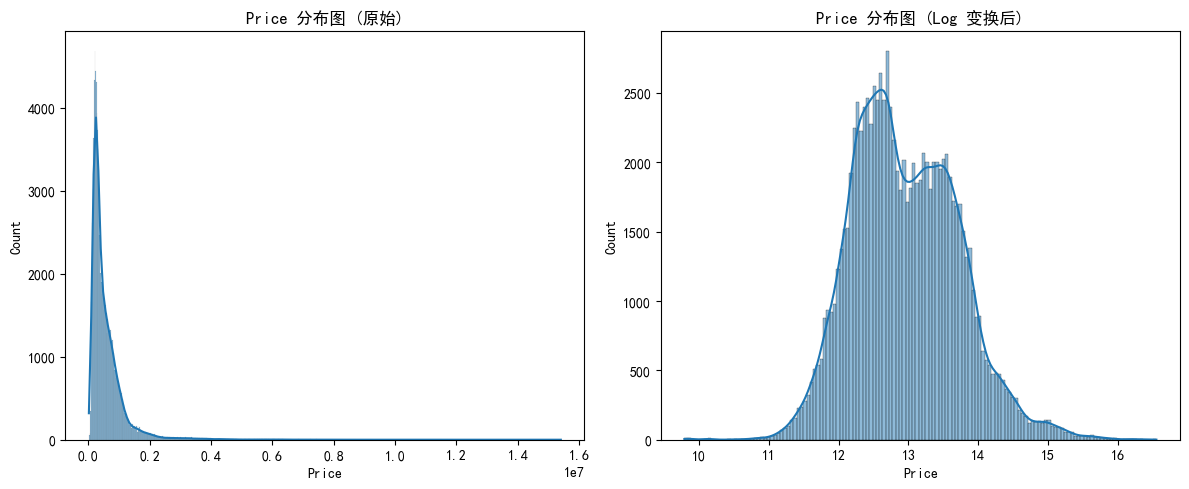

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
# 目标变量分析
Y_COL = 'Price'

print(f"\n--- 4. 目标变量 {Y_COL} 统计描述 ---")
print(df[Y_COL].describe())

# 可视化 (如果您的环境支持)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[Y_COL], kde=True)
plt.title(f'{Y_COL} 分布图 (原始)')

# 检查是否有异常值 (基于 Z-score 或 IQR)
print(f"\n--- 5. 目标变量 {Y_COL} 异常值检查 (使用 IQR) ---")
Q1 = df[Y_COL].quantile(0.25)
Q3 = df[Y_COL].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[Y_COL] < lower_bound) | (df[Y_COL] > upper_bound)]
print(f"低于下限 ({lower_bound:.2f}) 或高于上限 ({upper_bound:.2f}) 的异常值数量: {len(outliers)}")
print(f"异常值占总样本比例: {len(outliers) / len(df) * 100:.2f}%")

# 检查 Log 变换后的分布
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df[Y_COL]), kde=True)
plt.title(f'{Y_COL} 分布图 (Log 变换后)')

plt.tight_layout()
plt.show()

--- Log 变换后 (Log_Price) 的正态性检验 ---
偏度 (Skewness): 0.3627
峰度 (Kurtosis, Fisher): 0.1831


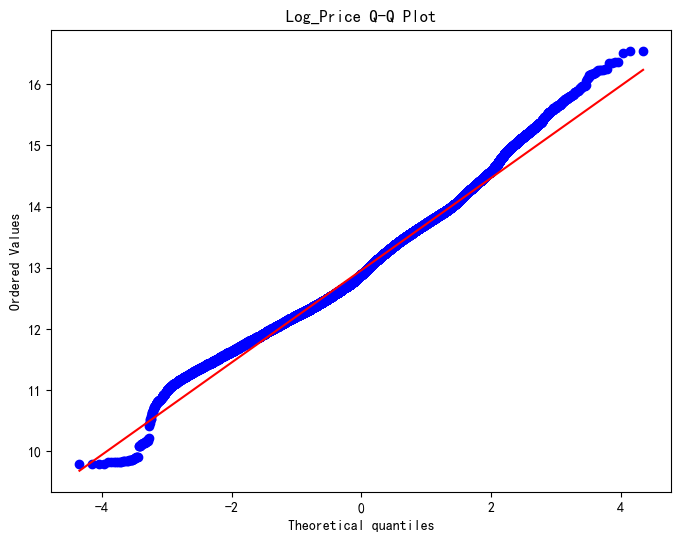


--- Kolmogorov-Smirnov 正态性检验 (KS Test) ---
KS 统计量: 0.0495
P-value: 2.5949273340212677e-211
结论: P-value < 0.05，我们拒绝零假设。Log 变换后的数据在统计上**不严格服从**正态分布，但其分布已得到显著改善。


In [ ]:
from scipy.stats import skew, kurtosis, probplot

df['Log_Price'] = np.log1p(df[Y_COL])

Y_COL = 'Log_Price'

# 1. 计算偏度和峰度
log_price_skew = skew(df[Y_COL])
log_price_kurt = kurtosis(df[Y_COL]) # 默认计算 Fisher 峰度

print(f"--- Log 变换后 ({Y_COL}) 的正态性检验 ---")
print(f"偏度 (Skewness): {log_price_skew:.4f}")
print(f"峰度 (Kurtosis, Fisher): {log_price_kurt:.4f}")

# 2. 可视化检验：Q-Q Plot
plt.figure(figsize=(8, 6))
# probplot 函数用于生成 Q-Q 图
probplot(df[Y_COL], dist="norm", plot=plt)
plt.title(f'{Y_COL} Q-Q Plot')
plt.show()

# 3. 统计检验
# Shapiro-Wilk 检验：用于小样本（n < 50）
# Kolmogorov-Smirnov 或 Anderson-Darling 检验：用于大样本
from scipy.stats import kstest, norm

# 使用 Kolmogorov-Smirnov 检验 (KS 检验)
# 零假设 H0: 数据服从正态分布
# 如果 P-value < 0.05，则拒绝 H0，认为数据不服从正态分布
ks_statistic, ks_p_value = kstest(df[Y_COL], 'norm', args=(df[Y_COL].mean(), df[Y_COL].std()))

print(f"\n--- Kolmogorov-Smirnov 正态性检验 (KS Test) ---")
print(f"KS 统计量: {ks_statistic:.4f}")
print(f"P-value: {ks_p_value}")

if ks_p_value < 0.05:
    print("结论: P-value < 0.05，我们拒绝零假设。Log 变换后的数据在统计上**不严格服从**正态分布，但其分布已得到显著改善。")
else:
    print("结论: P-value >= 0.05，我们没有充分证据拒绝零假设，数据可能服从正态分布。")

In [ ]:
def simplified_redundancy_check(df, similarity_threshold=0.9):
    """
    检查数据类型相同的列对，计算相似度，并删除相似度高且缺失值更多的列。
    """
    columns = df.columns.tolist()
    cols_to_drop = set()
    
    # 获取所有列的数据类型，用于快速比较
    col_dtypes = df.dtypes.to_dict()

    print(f"开始检查列之间的相似性 (阈值: {similarity_threshold * 100:.0f}%) ...")
    print("-" * 40)
    
    # 第一重循环：遍历所有列
    for i in range(len(columns)):
        col1 = columns[i]
        
        # 跳过已经标记要删除的列
        if col1 in cols_to_drop:
            continue
            
        # 第二重循环：与 col1 后面的所有列进行比较
        for j in range(i + 1, len(columns)):
            col2 = columns[j]

            # 跳过已经标记要删除的列
            if col2 in cols_to_drop:
                continue

            # 1. 快速检查：如果两列的数据类型不同，直接跳过
            if col_dtypes[col1] != col_dtypes[col2]:
                continue

            # --- 计算相似度 ---
            
            # 筛选出两列都非缺失值的行
            both_not_na = df[[col1, col2]].dropna()
            
            if both_not_na.empty:
                similarity = 0.0
            else:
                # 计算值相同的行数
                matches = (both_not_na[col1] == both_not_na[col2]).sum()
                # 相似度 = 匹配数 / 共同非缺失值的总数
                similarity = matches / len(both_not_na)
                
            # 2. 判断是否超过阈值
            if similarity >= similarity_threshold:
                print(f"找到高度相似列对 ({col1} / {col2})，相似度: {similarity:.4f}")
                
                # 3. 决定删除哪一列 (删除缺失值更多的)
                missing_count1 = df[col1].isna().sum()
                missing_count2 = df[col2].isna().sum()

                if missing_count1 > missing_count2:
                    col_to_remove = col1
                    cols_to_drop.add(col1)
                    print(f"    -> 删除 '{col1}' (缺失值: {missing_count1})，保留 '{col2}' (缺失值: {missing_count2})")
                elif missing_count2 > missing_count1:
                    col_to_remove = col2
                    cols_to_drop.add(col2)
                    print(f"    -> 删除 '{col2}' (缺失值: {missing_count2})，保留 '{col1}' (缺失值: {missing_count1})")
                else:
                    # 缺失值数量相等，默认删除第二列
                    col_to_remove = col2
                    cols_to_drop.add(col2)
                    print(f"    -> 缺失值数量相等 ({missing_count1})，删除 '{col2}'，保留 '{col1}'")
            
    # --- 执行删除操作 ---
    cols_to_drop_list = list(cols_to_drop)
    
    if cols_to_drop_list:
        df_cleaned = df.drop(columns=cols_to_drop_list)
        print("\n--- 结果 ---")
        print(f"最终删除的冗余列: {cols_to_drop_list}")
        print(f"原DataFrame列数: {df.shape[1]}, 新DataFrame列数: {df_cleaned.shape[1]}")
    else:
        df_cleaned = df
        print("\n--- 结果 ---")
        print("未找到需要删除的冗余列。")

    return df_cleaned

# 调用函数进行处理，并将结果存储在新的 DataFrame 中
df = simplified_redundancy_check(df, similarity_threshold=0.9)

开始检查列之间的相似性 (阈值: 90%) ...
----------------------------------------

--- 结果 ---
未找到需要删除的冗余列。


In [ ]:
df['所在位置'] = None
df['总楼层数'] = None

# 3. 处理包含 '地下' 的行
underground_mask = df['楼层'].str.contains('地下', na=False)

# 3.1. 所在位置设置为 '地下'
df.loc[underground_mask, '所在位置'] = '地下'

# 3.2. 提取数字并加上负号，填入 '总楼层数'
# 正则表达式 r'地下(\d+)' 提取 '地下' 后面的数字
underground_floors = df.loc[underground_mask, '楼层'].str.extract(r'地下(\d+)', expand=False)
# 将提取的数字转换为 float 并取负
df.loc[underground_mask, '总楼层数'] = underground_floors.astype(float) * -1


# 4. 处理不包含 '地下' 的其他行
non_underground_mask = ~underground_mask

# 4.1. 提取 '总楼层数'：即 '/' 后面的数字
# 正则表达式 r'/(\d+)' 提取 '/' 后面的数字
total_floor_extracted = df['楼层'].str.extract(r'/(\d+)', expand=False)
df.loc[non_underground_mask, '总楼层数'] = total_floor_extracted[non_underground_mask].astype(float)

# 提取 '/' 前面的部分，用于后续判断和处理
current_info = df['楼层'].str.split('/', expand=True)[0]

# 4.2. 处理 '/' 前面已经是 '低楼层' '中楼层' '高楼层' 字段的情况
named_floor_mask = non_underground_mask & current_info.str.contains(r'低楼层|中楼层|高楼层', na=False)
df.loc[named_floor_mask, '所在位置'] = current_info[named_floor_mask]

# 4.3. 处理 '/' 前面是数字的情况，并按比例换算
# '当前楼层' 的数字提取
# 正则表达式 r'(\d+)' 提取开头的数字
current_floor_extracted = current_info[non_underground_mask].str.extract(r'^(\d+)', expand=False)
numeric_floor_mask = non_underground_mask & current_floor_extracted.notna() & df['所在位置'].isna()

# 提取当前楼层数 (确保是 float 类型以进行除法)
current_floor = current_floor_extracted[numeric_floor_mask].astype(float)
total_floor = df.loc[numeric_floor_mask, '总楼层数']

# 计算比例
# 使用 .loc 确保操作发生在正确的子集上
floor_ratio = current_floor / total_floor

# 按比例换算楼层位置
def get_floor_level(ratio):
    if pd.isna(ratio):
        return None 
    elif ratio <= 1/3:
        return '低楼层'
    elif ratio <= 2/3:
        return '中楼层'
    else:
        return '高楼层'

# 应用函数
df.loc[numeric_floor_mask, '所在位置'] = floor_ratio.apply(get_floor_level)

# 5. 展示处理结果 (前10行以及新列)
print("原始 '楼层' 列和处理后的 '所在位置'、'总楼层数' 列（前10行）：")
print(df[['城市', '楼层', '所在位置', '总楼层数']].head(10))

原始 '楼层' 列和处理后的 '所在位置'、'总楼层数' 列（前10行）：
   城市       楼层 所在位置  总楼层数
0   0     4/6层  中楼层   6.0
1   0     4/6层  中楼层   6.0
2   0    1/18层  低楼层  18.0
3   0    1/10层  低楼层  10.0
4   0   18/18层  高楼层  18.0
5   0   17/17层  高楼层  17.0
6   0   17/17层  高楼层  17.0
7   0    5/17层  低楼层  17.0
8   0    5/17层  低楼层  17.0
9   0  中楼层/25层  中楼层  25.0


In [ ]:
import torch

print("--- 最终 PyTorch GPU 检查 ---")
print(f"CUDA 是否可用: {torch.cuda.is_available()}")
print(f"检测到的 GPU 数量: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"GPU 名称: {torch.cuda.get_device_name(0)}")

# 确认 CUDA 版本
print(f"PyTorch 编译的 CUDA 版本: {torch.version.cuda}")

--- 最终 PyTorch GPU 检查 ---
CUDA 是否可用: True
检测到的 GPU 数量: 1
GPU 名称: NVIDIA GeForce RTX 5060 Laptop GPU
PyTorch 编译的 CUDA 版本: 12.8


In [ ]:
from transformers import pipeline

TEXT_COLUMNS = ['客户反馈']

# 2. 情感分析模型路径（使用我们在前面讨论的中文模型）
MODEL_NAME = "IDEA-CCNL/Erlangshen-RoBERTa-110M-Sentiment"

# 3. 性能优化参数
BATCH_SIZE = 64 # 批次越大，GPU 利用率越高，但需要更多显存
MAX_SEQ_LENGTH = 512 # 限制文本长度，防止模型输入超限

def initialize_sentiment_pipeline():
    """
    初始化情感分析 pipeline，自动检测并选择 GPU。
    """
    # 检查 CUDA 是否可用
    if torch.cuda.is_available():
        device_index = 0  # 默认使用第一块 GPU
        device_info = torch.cuda.get_device_name(device_index)
        print(f"✅ GPU 检测成功，使用设备: {device_info} (Index: {device_index})")
    else:
        device_index = -1  # 回退到 CPU
        print("⚠️ 未检测到可用 GPU，将使用 CPU 进行运算。")

    try:
        sentiment_pipeline = pipeline(
            "sentiment-analysis",
            model=MODEL_NAME, 
            tokenizer=MODEL_NAME,
            device=device_index  # 传递设备索引
        )
        return sentiment_pipeline
    except Exception as e:
        print(f"❌ 情感分析模型加载失败: {e}")
        return None

def map_result_to_score(label, confidence):
    """
    将模型输出的标签和置信度映射到 0-10 的情绪评分。
    正面: [5, 10]，负面: [0, 5]，置信度为 0.5 时为 5 (中立)。
    """
    if label == 'positive':
        # 评分 = 5 + (置信度 * 5)
        score = 5 + (confidence * 5) 
    else: # negative
        # 评分 = 5 - (置信度 * 5)
        score = 5 - (confidence * 5)
    
    # 确保分数在 0 到 10 之间
    return max(0, min(10, score))


def process_and_score_column(df, column_name, sentiment_pipeline):
    """
    批量处理单个文本列，并将分数存入新列。
    """
    new_col_name = f'{column_name}_SentimentScore_0_10'
    
    # 1. 提取所有非缺失的文本，并记录索引
    # 必须确保处理的文本是非缺失值
    text_series = df[column_name].dropna()
    original_index = text_series.index
    text_list = text_series.astype(str).tolist()

    if not text_list:
        print(f"列 '{column_name}' 无有效文本，跳过。")
        df[new_col_name] = np.nan
        return df

    print(f"\n正在批量处理列: {column_name} ({len(text_list)} 条记录)...")
    
    try:
        # 2. 直接将列表传递给 pipeline 
        # truncation=True 确保文本不会超过模型最大长度
        results = sentiment_pipeline(
            text_list, 
            batch_size=BATCH_SIZE,  
            truncation=True
        ) 

        # 3. 解析结果并映射评分
        scores = [
            map_result_to_score(res['label'], res['score']) 
            for res in results
        ]

        # 4. 创建 Series 并使用原始索引，确保数据能回填到正确位置
        score_series = pd.Series(scores, index=original_index)
        df[new_col_name] = score_series
        
        print(f"✅ 列 '{column_name}' 转换完成。")

    except Exception as e:
        print(f"❌ 列 '{column_name}' 处理失败: {e}")
        df[new_col_name] = np.nan
        
    return df

# --- 主执行流程 ---
sentiment_pipeline = initialize_sentiment_pipeline()

if sentiment_pipeline:
    for col in TEXT_COLUMNS:
        df = process_and_score_column(df, col, sentiment_pipeline)

    print("\n所有文本列情绪评分转换完成。")
else:
    print("无法进行情感分析，因为 pipeline 未成功初始化。")

c:\Users\lshte\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ GPU 检测成功，使用设备: NVIDIA GeForce RTX 5060 Laptop GPU (Index: 0)


Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



正在批量处理列: 客户反馈 (98899 条记录)...
✅ 列 '客户反馈' 转换完成。

所有文本列情绪评分转换完成。


In [ ]:
# 统计每列不同值的数量
unique_counts = df.nunique()

# 打印结果
pd.set_option('display.max_rows', None)
print("DataFrame 每列不同值的数量 (nunique):")
print("-" * 40)
print(unique_counts)

DataFrame 每列不同值的数量 (nunique):
----------------------------------------
城市                             12
户型                            208
装修                              1
Price                       98569
楼层                           1051
面积                          10981
朝向                             91
交易时间                          296
付款方式                            7
租赁方式                            2
电梯                              2
车位                              2
用水                              2
用电                              2
燃气                              2
采暖                              2
租期                             85
配套设施                          713
lon                         98899
lat                         98899
年份                              2
区县                            104
板块                            916
环线位置                           11
物业类别                          233
建筑年代                          736
开发商                          2085
房屋总数       

In [ ]:
# --- 新增特征工程函数：创建“南北通透”特征 ---
def create_north_south_feature(df):
    if '朝向' not in df.columns:
        # 如果原始列不存在，则创建全为 0 的新列，并返回
        df.loc[:, '南北通透'] = 0
        return df

    # 将朝向转换为大写字符串以确保匹配鲁棒性
    orientation_series = df['朝向'].astype(str).str.upper().fillna('')
    
    # 判断是否同时包含“南”和“北”
    # .str.contains() 使用了正则表达式的 lookahead (?=.*) 来确保两个条件都在字符串中
    is_north_south = (
        orientation_series.str.contains('南', regex=False) & 
        orientation_series.str.contains('北', regex=False)
    )
    
    # 创建新列，True -> 1, False -> 0
    df.loc[:, '南北通透'] = is_north_south.astype(int)
    
    # 删除原始列
    df = df.drop(columns=['朝向'], errors='ignore')
    return df

df = create_north_south_feature(df)
print("\n--- 南北通透特征预处理结果预览 ---")
print(df[['南北通透']].head(10))


--- 南北通透特征预处理结果预览 ---
   南北通透
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0


In [ ]:
import re

NUMERIC_PATTERN = re.compile(r'\d*\.?\d+')

def universal_numeric_cleaner(value):
    """
    1. 从字符串中提取所有数字（整数或浮点数）。
    2. 如果提取到 >= 2 个数字，计算它们的平均值。
    3. 如果提取到 1 个数字，返回该数字。
    4. 否则返回 np.nan。
    """
    if pd.isna(value) or value is None:
        return np.nan
    
    # 转换为字符串进行处理
    val_str = str(value)

    # 查找所有匹配的数字字符串
    numeric_strings = NUMERIC_PATTERN.findall(val_str)
    
    if not numeric_strings:
        return np.nan

    # 尝试将所有匹配的字符串转换为浮点数
    try:
        numbers = [float(s) for s in numeric_strings]
    except ValueError:
        return np.nan

    num_count = len(numbers)

    if num_count >= 2:
        # 提取到两个或更多数字，取平均值
        return np.mean(numbers)
    elif num_count == 1:
        # 只提取到一个数字，直接返回
        return numbers[0]
    else:
        return np.nan
    
custom_transform_features = [
    '面积','建筑年代','房屋总数', '楼栋总数', '绿 化 率', '物 业 费', '燃气费', '供热费'
] 

print("--- 开始应用全局数值清洗 ---")

for col in custom_transform_features:
    if col in df.columns:
        # 使用 apply 函数应用转换
        df[col] = df[col].apply(universal_numeric_cleaner)
        # 强制转换为 float 类型（虽然 apply 结果通常是 float）
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"特征 '{col}' 已转换为数值型。缺失值数量: {df[col].isnull().sum()}")
    else:
        print(f"注意: 特征 '{col}' 在当前 DataFrame 中不存在，可能已在之前的高缺失率处理中删除。")

print("--- 全局数值清洗完成 ---")

--- 开始应用全局数值清洗 ---
特征 '面积' 已转换为数值型。缺失值数量: 0
特征 '建筑年代' 已转换为数值型。缺失值数量: 26149
特征 '房屋总数' 已转换为数值型。缺失值数量: 4631
特征 '楼栋总数' 已转换为数值型。缺失值数量: 4631
特征 '绿 化 率' 已转换为数值型。缺失值数量: 24402
特征 '物 业 费' 已转换为数值型。缺失值数量: 22159
特征 '燃气费' 已转换为数值型。缺失值数量: 25057
特征 '供热费' 已转换为数值型。缺失值数量: 70064
--- 全局数值清洗完成 ---


In [ ]:
# 缺失值特殊处理
df['采暖'] =  df['采暖'].fillna('无供暖')
df['供热费'] = df['供热费'].fillna(0)

In [ ]:
import re
def split_house_layout(df):
    if '户型' not in df.columns:
        return df

    # 1. 标准化：将所有“房间”替换为“室”
    # 使用 .loc 确保赋值安全
    # 先填充 NaN 为空字符串以保证 .str 链式操作稳定，这不会影响数字提取失败时得到的 NaN
    layout_series = df['户型'].astype(str).str.replace('房间', '室', regex=False).fillna('')
    layout_series = df['户型'].astype(str).str.replace('居室', '室', regex=False).fillna('')
    
    # 定义要提取的户型部分及其对应的列名
    layout_parts = {
        '室': 'Num_Rooms',
        '厅': 'Num_Halls',
        '卫': 'Num_Bathrooms'
    }
    
    # 2. 和 3. 提取数字并创建新列
    for part, col_name in layout_parts.items():
        # 正则表达式: 匹配数字 (\d+) 紧跟着 part (例如: '室')
        
        # 关键修正：确保提取到的结果直接通过 pd.to_numeric 转换为 float，
        # 这样无法提取或原始为 NaN/空字符串的条目都会得到 NaN (float)
        extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0] 
        
        # 使用 pd.to_numeric(errors='coerce') 将所有非数字的提取结果（包括 NaN）转为 NaN float
        df.loc[:, col_name] = pd.to_numeric(extracted_num_str, errors='coerce')
        # NaN 将被保留，交给 ColumnTransformer 中的 Imputer 处理
    
    # 4. 删除原始列
    df = df.drop(columns=['户型'], errors='ignore')
    return df

df = split_house_layout(df)
print("\n--- 房屋户型预处理结果预览 ---")
print(df[['Num_Rooms', 'Num_Halls', 'Num_Bathrooms']].head(10))

<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lshte\AppData\Local\Temp\ipykernel_18804\1132744914.py:25: SyntaxWarning: invalid escape sequence '\d'
  extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0]



--- 房屋户型预处理结果预览 ---
   Num_Rooms  Num_Halls  Num_Bathrooms
0        1.0        1.0            1.0
1        1.0        1.0            1.0
2        1.0        1.0            1.0
3        3.0        1.0            2.0
4        1.0        1.0            1.0
5        1.0        1.0            1.0
6        1.0        1.0            1.0
7        1.0        1.0            1.0
8        1.0        1.0            1.0
9        3.0        2.0            NaN


In [ ]:
df.drop(columns=['物业办公电话','停车费用','供水','供暖','供电','coord_x','coord_y','客户反馈','楼层'], inplace=True) # 删除无用列
df.drop(columns=['开发商','物业公司','交易时间'], inplace=True) # 类别过多，避免模型过拟合


In [ ]:
output_filename = 'rent_processed_data.csv' 

# 使用 to_csv() 方法输出到文件
df.to_csv(
    output_filename, 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 CSV 文件
    encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)
df.to_excel(
    'rent_processed_data.xlsx', 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 Excel 文件
    #encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)

# Rent - test data

In [ ]:
import pandas as pd
import numpy as np

# 加载数据
try:
    df_raw = pd.read_csv('ruc_Class25Q2_test_rent.csv')
except Exception as e:
    print(f"加载数据失败: {e}. 请检查文件路径和名称。")

df = df_raw.copy()

# data analysis
print("--- 1. 数据形状 (Shape) ---")
print(f"行数 (样本数): {df.shape[0]}, 列数 (特征数): {df.shape[1]}")

print("\n--- 2. 数据信息和缺失值概览 (Info) ---")
# 检查数据类型和非空值数量
print(df.info(verbose=True))

--- 1. 数据形状 (Shape) ---
行数 (样本数): 9773, 列数 (特征数): 46

--- 2. 数据信息和缺失值概览 (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 46 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       9773 non-null   int64  
 1   城市       9773 non-null   int64  
 2   户型       9773 non-null   object 
 3   装修       7091 non-null   object 
 4   楼层       9773 non-null   object 
 5   面积       9773 non-null   object 
 6   朝向       9773 non-null   object 
 7   交易时间     9773 non-null   object 
 8   付款方式     7386 non-null   object 
 9   租赁方式     9773 non-null   object 
 10  电梯       9773 non-null   object 
 11  车位       2162 non-null   object 
 12  用水       7500 non-null   object 
 13  用电       7546 non-null   object 
 14  燃气       9182 non-null   object 
 15  采暖       3213 non-null   object 
 16  租期       4598 non-null   object 
 17  配套设施     6079 non-null   object 
 18  lon      9773 non-null   float64
 19  lat    

In [ ]:
def simplified_redundancy_check(df, similarity_threshold=0.9):
    """
    检查数据类型相同的列对，计算相似度，并删除相似度高且缺失值更多的列。
    """
    columns = df.columns.tolist()
    cols_to_drop = set()
    
    # 获取所有列的数据类型，用于快速比较
    col_dtypes = df.dtypes.to_dict()

    print(f"开始检查列之间的相似性 (阈值: {similarity_threshold * 100:.0f}%) ...")
    print("-" * 40)
    
    # 第一重循环：遍历所有列
    for i in range(len(columns)):
        col1 = columns[i]
        
        # 跳过已经标记要删除的列
        if col1 in cols_to_drop:
            continue
            
        # 第二重循环：与 col1 后面的所有列进行比较
        for j in range(i + 1, len(columns)):
            col2 = columns[j]

            # 跳过已经标记要删除的列
            if col2 in cols_to_drop:
                continue

            # 1. 快速检查：如果两列的数据类型不同，直接跳过
            if col_dtypes[col1] != col_dtypes[col2]:
                continue

            # --- 计算相似度 ---
            
            # 筛选出两列都非缺失值的行
            both_not_na = df[[col1, col2]].dropna()
            
            if both_not_na.empty:
                similarity = 0.0
            else:
                # 计算值相同的行数
                matches = (both_not_na[col1] == both_not_na[col2]).sum()
                # 相似度 = 匹配数 / 共同非缺失值的总数
                similarity = matches / len(both_not_na)
                
            # 2. 判断是否超过阈值
            if similarity >= similarity_threshold:
                print(f"找到高度相似列对 ({col1} / {col2})，相似度: {similarity:.4f}")
                
                # 3. 决定删除哪一列 (删除缺失值更多的)
                missing_count1 = df[col1].isna().sum()
                missing_count2 = df[col2].isna().sum()

                if missing_count1 > missing_count2:
                    col_to_remove = col1
                    cols_to_drop.add(col1)
                    print(f"    -> 删除 '{col1}' (缺失值: {missing_count1})，保留 '{col2}' (缺失值: {missing_count2})")
                elif missing_count2 > missing_count1:
                    col_to_remove = col2
                    cols_to_drop.add(col2)
                    print(f"    -> 删除 '{col2}' (缺失值: {missing_count2})，保留 '{col1}' (缺失值: {missing_count1})")
                else:
                    # 缺失值数量相等，默认删除第二列
                    col_to_remove = col2
                    cols_to_drop.add(col2)
                    print(f"    -> 缺失值数量相等 ({missing_count1})，删除 '{col2}'，保留 '{col1}'")
            
    # --- 执行删除操作 ---
    cols_to_drop_list = list(cols_to_drop)
    
    if cols_to_drop_list:
        df_cleaned = df.drop(columns=cols_to_drop_list)
        print("\n--- 结果 ---")
        print(f"最终删除的冗余列: {cols_to_drop_list}")
        print(f"原DataFrame列数: {df.shape[1]}, 新DataFrame列数: {df_cleaned.shape[1]}")
    else:
        df_cleaned = df
        print("\n--- 结果 ---")
        print("未找到需要删除的冗余列。")

    return df_cleaned

# 调用函数进行处理，并将结果存储在新的 DataFrame 中
df = simplified_redundancy_check(df, similarity_threshold=0.9)

开始检查列之间的相似性 (阈值: 90%) ...
----------------------------------------

--- 结果 ---
未找到需要删除的冗余列。


In [ ]:
df['所在位置'] = None
df['总楼层数'] = None

# 3. 处理包含 '地下' 的行
underground_mask = df['楼层'].str.contains('地下', na=False)

# 3.1. 所在位置设置为 '地下'
df.loc[underground_mask, '所在位置'] = '地下'

# 3.2. 提取数字并加上负号，填入 '总楼层数'
# 正则表达式 r'地下(\d+)' 提取 '地下' 后面的数字
underground_floors = df.loc[underground_mask, '楼层'].str.extract(r'地下(\d+)', expand=False)
# 将提取的数字转换为 float 并取负
df.loc[underground_mask, '总楼层数'] = underground_floors.astype(float) * -1


# 4. 处理不包含 '地下' 的其他行
non_underground_mask = ~underground_mask

# 4.1. 提取 '总楼层数'：即 '/' 后面的数字
# 正则表达式 r'/(\d+)' 提取 '/' 后面的数字
total_floor_extracted = df['楼层'].str.extract(r'/(\d+)', expand=False)
df.loc[non_underground_mask, '总楼层数'] = total_floor_extracted[non_underground_mask].astype(float)

# 提取 '/' 前面的部分，用于后续判断和处理
current_info = df['楼层'].str.split('/', expand=True)[0]

# 4.2. 处理 '/' 前面已经是 '低楼层' '中楼层' '高楼层' 字段的情况
named_floor_mask = non_underground_mask & current_info.str.contains(r'低楼层|中楼层|高楼层', na=False)
df.loc[named_floor_mask, '所在位置'] = current_info[named_floor_mask]

# 4.3. 处理 '/' 前面是数字的情况，并按比例换算
# '当前楼层' 的数字提取
# 正则表达式 r'(\d+)' 提取开头的数字
current_floor_extracted = current_info[non_underground_mask].str.extract(r'^(\d+)', expand=False)
numeric_floor_mask = non_underground_mask & current_floor_extracted.notna() & df['所在位置'].isna()

# 提取当前楼层数 (确保是 float 类型以进行除法)
current_floor = current_floor_extracted[numeric_floor_mask].astype(float)
total_floor = df.loc[numeric_floor_mask, '总楼层数']

# 计算比例
# 使用 .loc 确保操作发生在正确的子集上
floor_ratio = current_floor / total_floor

# 按比例换算楼层位置
def get_floor_level(ratio):
    if pd.isna(ratio):
        return None 
    elif ratio <= 1/3:
        return '低楼层'
    elif ratio <= 2/3:
        return '中楼层'
    else:
        return '高楼层'

# 应用函数
df.loc[numeric_floor_mask, '所在位置'] = floor_ratio.apply(get_floor_level)

# 5. 展示处理结果 (前10行以及新列)
print("原始 '楼层' 列和处理后的 '所在位置'、'总楼层数' 列（前10行）：")
print(df[['城市', '楼层', '所在位置', '总楼层数']].head(10))

原始 '楼层' 列和处理后的 '所在位置'、'总楼层数' 列（前10行）：
   城市       楼层 所在位置  总楼层数
0   1  低楼层/18层  低楼层  18.0
1  10   低楼层/8层  低楼层   8.0
2   3  中楼层/20层  中楼层  20.0
3   0  高楼层/12层  高楼层  12.0
4   3  中楼层/23层  中楼层  23.0
5   2   30/45层  中楼层  45.0
6   9  中楼层/34层  中楼层  34.0
7   4   中楼层/6层  中楼层   6.0
8   9  高楼层/32层  高楼层  32.0
9   1   中楼层/9层  中楼层   9.0


In [ ]:
import torch

print("--- 最终 PyTorch GPU 检查 ---")
print(f"CUDA 是否可用: {torch.cuda.is_available()}")
print(f"检测到的 GPU 数量: {torch.cuda.device_count()}")
if torch.cuda.is_available():
    print(f"GPU 名称: {torch.cuda.get_device_name(0)}")

# 确认 CUDA 版本
print(f"PyTorch 编译的 CUDA 版本: {torch.version.cuda}")

--- 最终 PyTorch GPU 检查 ---
CUDA 是否可用: True
检测到的 GPU 数量: 1
GPU 名称: NVIDIA GeForce RTX 5060 Laptop GPU
PyTorch 编译的 CUDA 版本: 12.8


In [ ]:
from transformers import pipeline

TEXT_COLUMNS = ['客户反馈']

# 2. 情感分析模型路径（使用我们在前面讨论的中文模型）
MODEL_NAME = "IDEA-CCNL/Erlangshen-RoBERTa-110M-Sentiment"

# 3. 性能优化参数
BATCH_SIZE = 64 # 批次越大，GPU 利用率越高，但需要更多显存
MAX_SEQ_LENGTH = 512 # 限制文本长度，防止模型输入超限

def initialize_sentiment_pipeline():
    """
    初始化情感分析 pipeline，自动检测并选择 GPU。
    """
    # 检查 CUDA 是否可用
    if torch.cuda.is_available():
        device_index = 0  # 默认使用第一块 GPU
        device_info = torch.cuda.get_device_name(device_index)
        print(f"✅ GPU 检测成功，使用设备: {device_info} (Index: {device_index})")
    else:
        device_index = -1  # 回退到 CPU
        print("⚠️ 未检测到可用 GPU，将使用 CPU 进行运算。")

    try:
        sentiment_pipeline = pipeline(
            "sentiment-analysis",
            model=MODEL_NAME, 
            tokenizer=MODEL_NAME,
            device=device_index  # 传递设备索引
        )
        return sentiment_pipeline
    except Exception as e:
        print(f"❌ 情感分析模型加载失败: {e}")
        return None

def map_result_to_score(label, confidence):
    """
    将模型输出的标签和置信度映射到 0-10 的情绪评分。
    正面: [5, 10]，负面: [0, 5]，置信度为 0.5 时为 5 (中立)。
    """
    if label == 'positive':
        # 评分 = 5 + (置信度 * 5)
        score = 5 + (confidence * 5) 
    else: # negative
        # 评分 = 5 - (置信度 * 5)
        score = 5 - (confidence * 5)
    
    # 确保分数在 0 到 10 之间
    return max(0, min(10, score))


def process_and_score_column(df, column_name, sentiment_pipeline):
    """
    批量处理单个文本列，并将分数存入新列。
    """
    new_col_name = f'{column_name}_SentimentScore_0_10'
    
    # 1. 提取所有非缺失的文本，并记录索引
    # 必须确保处理的文本是非缺失值
    text_series = df[column_name].dropna()
    original_index = text_series.index
    text_list = text_series.astype(str).tolist()

    if not text_list:
        print(f"列 '{column_name}' 无有效文本，跳过。")
        df[new_col_name] = np.nan
        return df

    print(f"\n正在批量处理列: {column_name} ({len(text_list)} 条记录)...")
    
    try:
        # 2. 直接将列表传递给 pipeline 
        # truncation=True 确保文本不会超过模型最大长度
        results = sentiment_pipeline(
            text_list, 
            batch_size=BATCH_SIZE,  
            truncation=True
        ) 

        # 3. 解析结果并映射评分
        scores = [
            map_result_to_score(res['label'], res['score']) 
            for res in results
        ]

        # 4. 创建 Series 并使用原始索引，确保数据能回填到正确位置
        score_series = pd.Series(scores, index=original_index)
        df[new_col_name] = score_series
        
        print(f"✅ 列 '{column_name}' 转换完成。")

    except Exception as e:
        print(f"❌ 列 '{column_name}' 处理失败: {e}")
        df[new_col_name] = np.nan
        
    return df

# --- 主执行流程 ---
sentiment_pipeline = initialize_sentiment_pipeline()

if sentiment_pipeline:
    for col in TEXT_COLUMNS:
        df = process_and_score_column(df, col, sentiment_pipeline)

    print("\n所有文本列情绪评分转换完成。")
else:
    print("无法进行情感分析，因为 pipeline 未成功初始化。")

c:\Users\lshte\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


✅ GPU 检测成功，使用设备: NVIDIA GeForce RTX 5060 Laptop GPU (Index: 0)


Device set to use cuda:0
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.



正在批量处理列: 客户反馈 (9773 条记录)...
✅ 列 '客户反馈' 转换完成。

所有文本列情绪评分转换完成。


In [ ]:
# 统计每列不同值的数量
unique_counts = df.nunique()

# 打印结果
pd.set_option('display.max_rows', None)
print("DataFrame 每列不同值的数量 (nunique):")
print("-" * 40)
print(unique_counts)

DataFrame 每列不同值的数量 (nunique):
----------------------------------------
ID                          9773
城市                            12
户型                            97
装修                             1
楼层                           627
面积                          2990
朝向                            56
交易时间                         260
付款方式                           5
租赁方式                           2
电梯                             2
车位                             2
用水                             2
用电                             2
燃气                             2
采暖                             2
租期                            48
配套设施                         361
lon                         9773
lat                         9773
年份                             2
区县                           103
板块                           778
环线位置                          11
物业类别                         185
建筑年代                         594
开发商                         1341
房屋总数                        1443
楼栋总数 

In [ ]:
# --- 新增特征工程函数：创建“南北通透”特征 ---
def create_north_south_feature(df):
    if '朝向' not in df.columns:
        # 如果原始列不存在，则创建全为 0 的新列，并返回
        df.loc[:, '南北通透'] = 0
        return df

    # 将朝向转换为大写字符串以确保匹配鲁棒性
    orientation_series = df['朝向'].astype(str).str.upper().fillna('')
    
    # 判断是否同时包含“南”和“北”
    # .str.contains() 使用了正则表达式的 lookahead (?=.*) 来确保两个条件都在字符串中
    is_north_south = (
        orientation_series.str.contains('南', regex=False) & 
        orientation_series.str.contains('北', regex=False)
    )
    
    # 创建新列，True -> 1, False -> 0
    df.loc[:, '南北通透'] = is_north_south.astype(int)
    
    # 删除原始列
    df = df.drop(columns=['朝向'], errors='ignore')
    return df

df = create_north_south_feature(df)
print("\n--- 南北通透特征预处理结果预览 ---")
print(df[['南北通透']].head(10))


--- 南北通透特征预处理结果预览 ---
   南北通透
0     1
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0


In [ ]:
import re

NUMERIC_PATTERN = re.compile(r'\d*\.?\d+')

def universal_numeric_cleaner(value):
    """
    1. 从字符串中提取所有数字（整数或浮点数）。
    2. 如果提取到 >= 2 个数字，计算它们的平均值。
    3. 如果提取到 1 个数字，返回该数字。
    4. 否则返回 np.nan。
    """
    if pd.isna(value) or value is None:
        return np.nan
    
    # 转换为字符串进行处理
    val_str = str(value)

    # 查找所有匹配的数字字符串
    numeric_strings = NUMERIC_PATTERN.findall(val_str)
    
    if not numeric_strings:
        return np.nan

    # 尝试将所有匹配的字符串转换为浮点数
    try:
        numbers = [float(s) for s in numeric_strings]
    except ValueError:
        return np.nan

    num_count = len(numbers)

    if num_count >= 2:
        # 提取到两个或更多数字，取平均值
        return np.mean(numbers)
    elif num_count == 1:
        # 只提取到一个数字，直接返回
        return numbers[0]
    else:
        return np.nan
    
custom_transform_features = [
    '面积','建筑年代','房屋总数', '楼栋总数', '绿 化 率', '物 业 费', '燃气费', '供热费'
] 

print("--- 开始应用全局数值清洗 ---")

for col in custom_transform_features:
    if col in df.columns:
        # 使用 apply 函数应用转换
        df[col] = df[col].apply(universal_numeric_cleaner)
        # 强制转换为 float 类型（虽然 apply 结果通常是 float）
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"特征 '{col}' 已转换为数值型。缺失值数量: {df[col].isnull().sum()}")
    else:
        print(f"注意: 特征 '{col}' 在当前 DataFrame 中不存在，可能已在之前的高缺失率处理中删除。")

print("--- 全局数值清洗完成 ---")

--- 开始应用全局数值清洗 ---
特征 '面积' 已转换为数值型。缺失值数量: 0
特征 '建筑年代' 已转换为数值型。缺失值数量: 3381
特征 '房屋总数' 已转换为数值型。缺失值数量: 923
特征 '楼栋总数' 已转换为数值型。缺失值数量: 923
特征 '绿 化 率' 已转换为数值型。缺失值数量: 3019
特征 '物 业 费' 已转换为数值型。缺失值数量: 2804
特征 '燃气费' 已转换为数值型。缺失值数量: 3142
特征 '供热费' 已转换为数值型。缺失值数量: 7054
--- 全局数值清洗完成 ---


In [ ]:
# 缺失值特殊处理
df['采暖'] =  df['采暖'].fillna('无供暖')
df['供热费'] = df['供热费'].fillna(0)

In [ ]:
import re
def split_house_layout(df):
    if '户型' not in df.columns:
        return df

    # 1. 标准化：将所有“房间”替换为“室”
    # 使用 .loc 确保赋值安全
    # 先填充 NaN 为空字符串以保证 .str 链式操作稳定，这不会影响数字提取失败时得到的 NaN
    layout_series = df['户型'].astype(str).str.replace('房间', '室', regex=False).fillna('')
    layout_series = df['户型'].astype(str).str.replace('居室', '室', regex=False).fillna('')
    
    # 定义要提取的户型部分及其对应的列名
    layout_parts = {
        '室': 'Num_Rooms',
        '厅': 'Num_Halls',
        '卫': 'Num_Bathrooms'
    }
    
    # 2. 和 3. 提取数字并创建新列
    for part, col_name in layout_parts.items():
        # 正则表达式: 匹配数字 (\d+) 紧跟着 part (例如: '室')
        
        # 关键修正：确保提取到的结果直接通过 pd.to_numeric 转换为 float，
        # 这样无法提取或原始为 NaN/空字符串的条目都会得到 NaN (float)
        extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0] 
        
        # 使用 pd.to_numeric(errors='coerce') 将所有非数字的提取结果（包括 NaN）转为 NaN float
        df.loc[:, col_name] = pd.to_numeric(extracted_num_str, errors='coerce')
        # NaN 将被保留，交给 ColumnTransformer 中的 Imputer 处理
    
    # 4. 删除原始列
    df = df.drop(columns=['户型'], errors='ignore')
    return df

df = split_house_layout(df)
print("\n--- 房屋户型预处理结果预览 ---")
print(df[['Num_Rooms', 'Num_Halls', 'Num_Bathrooms']].head(10))


--- 房屋户型预处理结果预览 ---
   Num_Rooms  Num_Halls  Num_Bathrooms
0        2.0        2.0              1
1        2.0        1.0              1
2        2.0        2.0              1
3        2.0        1.0              1
4        3.0        2.0              2
5        3.0        2.0              1
6        3.0        2.0              2
7        3.0        1.0              1
8        2.0        1.0              1
9        1.0        1.0              1


<>:25: SyntaxWarning: invalid escape sequence '\d'
<>:25: SyntaxWarning: invalid escape sequence '\d'
C:\Users\lshte\AppData\Local\Temp\ipykernel_24620\1132744914.py:25: SyntaxWarning: invalid escape sequence '\d'
  extracted_num_str = layout_series.str.extract(f'(\d+){part}')[0]


In [ ]:
df.drop(columns=['物业办公电话','停车费用','供水','供暖','供电','coord_x','coord_y','客户反馈','楼层'], inplace=True) # 删除无用列
df.drop(columns=['开发商','物业公司','交易时间'], inplace=True) # 类别过多，避免模型过拟合


In [ ]:
output_filename = 'rent_test_processed_data.csv' 

# 使用 to_csv() 方法输出到文件
df.to_csv(
    output_filename, 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 CSV 文件
    encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)
df.to_excel(
    'rent_test_processed_data.xlsx', 
    index=False,      # 关键参数：不将 DataFrame 的索引作为一列写入 Excel 文件
    #encoding='utf-8'  # 推荐：使用 'utf-8' 编码，以确保中文内容正确显示
)

# Sales - regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error, make_scorer

df = pd.read_csv('sales_processed_data.csv', encoding='utf-8')

X = df.drop(columns=['Price', 'Log_Price','房屋优势_SentimentScore_0_10',
                     '核心卖点_SentimentScore_0_10',
                     '户型介绍_SentimentScore_0_10'
                     ]) # X 包含所有特征
Y = df['Log_Price'] # Y 是 Log 后的目标变量

# 划分数据集 (80% 训练，20% 测试)
RANDOM_STATE = 111 
TEST_SIZE = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

print("--- 数据划分结果 ---")
print(f"训练集样本数: {len(X_train)}")
print(f"测试集样本数: {len(X_test)}")

--- 数据划分结果 ---
训练集样本数: 83096
测试集样本数: 20775


C:\Users\lshte\AppData\Local\Temp\ipykernel_18548\507045581.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sales_processed_data.csv', encoding='utf-8')


In [ ]:
# 定义 MAE (Mean Absolute Error) 评分函数，并进行 Log 逆变换
def mae_inverse_transform(y_true_log, y_pred_log):
    """计算逆变换后的 MAE"""
    y_true = np.expm1(y_true_log)  # exp(y_log) - 1
    y_pred = np.expm1(y_pred_log)
    return mean_absolute_error(y_true, y_pred)

# 定义 RMAE (Relative Mean Absolute Error) 评分函数
def rmae_inverse_transform(y_true_log, y_pred_log):
    """计算逆变换后的 RMAE"""
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    
    mean_y_true = np.mean(y_true)
    if mean_y_true == 0:
        return np.nan # 避免除零错误
    
    return mean_absolute_error(y_true, y_pred) / mean_y_true

# 创建 MAE 和 RMAE 评分器。cross_val_score 需要一个 greater_is_better=False 的评分器来最小化误差。
mae_scorer = make_scorer(mae_inverse_transform, greater_is_better=False) 
rmae_scorer = make_scorer(rmae_inverse_transform, greater_is_better=False) 

In [ ]:
class OutlierClipper(BaseEstimator, TransformerMixin):
    """
    针对数值型特征，使用 IQR 规则逐列识别离群值，并根据其比例决定是否删除相应的行。
    
    逻辑:
    1. Fit: 学习数值特征的 IQR 边界 (Q1 - 1.5*IQR, Q3 + 1.5*IQR)。
    2. Transform:
       - 遍历每个数值列。
       - 统计该列的离群值个数。
       - 如果 (该列离群值个数 / 总行数) < threshold (0.001 或 0.1%)，则将包含这些离群值的行标记为待删除。
       - 最终，删除所有被标记的行。
    
    注意：此类必须在 Pipeline 中 ColumnTransformer 之前使用。
    """
    
    def __init__(self, factor=1.5, threshold=0.001): # threshold 设为 0.001 (0.1%)
        """
        参数:
        factor (float): IQR 乘数因子，默认为 1.5。
        threshold (float): 单列离群值占总行数的比例阈值，默认为 0.001 (0.1%)。
        """
        self.factor = factor
        self.threshold = threshold
        self.bounds_ = {}            # 存储边界 {col_name: (lower, upper)}
        self.numerical_cols_ = []  # 存储数值列的名称

    def fit(self, X, y=None):
        """学习 IQR 边界。"""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("OutlierClipperSelective.fit 必须接收 Pandas DataFrame。")
        
        # 1. 识别数值列
        self.numerical_cols_ = X.select_dtypes(include=np.number).columns
        
        # 2. 计算边界
        self.bounds_ = {}
        for col in self.numerical_cols_:
            data = X[col].dropna()
            if data.empty:
                continue
            
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - self.factor * IQR
            upper_bound = Q3 + self.factor * IQR
            
            self.bounds_[col] = (lower_bound, upper_bound)
        
        return self

    def transform(self, X, y=None):
        """执行选择性离群值删除。"""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("OutlierClipperSelective.transform 必须接收 Pandas DataFrame。")

        X_df = X.copy()
        total_rows = len(X_df)
        if total_rows == 0:
            return X 

        # 初始化一个集合，用于存储所有需要删除的行的索引 (Index)
        indices_to_drop = set()
        
        print(f"\n[OutlierClipperSelective] 开始逐列离群值检查，总行数: {total_rows}。")

        # 1. 遍历每个数值列进行判断
        for col, (lower_bound, upper_bound) in self.bounds_.items():
            if col not in X_df.columns:
                continue
                
            col_data = X_df[col]
            
            # 识别该列的离群值 mask
            outlier_mask = (col_data < lower_bound) | (col_data > upper_bound)
            
            num_outliers = outlier_mask.sum()
            outlier_percentage = num_outliers / total_rows

            if num_outliers == 0:
                # print(f"  - 列 '{col}'：未检测到离群值。")
                continue
            
            # 2. 判断是否删除
            if outlier_percentage < self.threshold:
                # 离群值比例过低，决定删除
                
                # 获取该列离群值对应的行索引
                current_indices = set(X_df[outlier_mask].index.tolist())
                indices_to_drop.update(current_indices) # 添加到待删除集合
                
                print(f"  - 列 '{col}'：比例 {outlier_percentage:.5f} (<{self.threshold})，标记 {len(current_indices)} 行删除。")
            else:
                # 离群值比例过高，不删除
                print(f"  - 列 '{col}'：比例 {outlier_percentage:.5f} (>= {self.threshold})，不删除。")

        # 3. 执行最终删除操作
        num_total_dropped = len(indices_to_drop)
        
        if num_total_dropped > 0:
            # 删除所有标记的行
            X_transformed = X_df.drop(list(indices_to_drop), axis=0)
            
            print(f"\n[OutlierClipperSelective] 清理完成：")
            print(f"  - 总共删除 {num_total_dropped} 行。")
            
            # *** 报告剩余样本数 ***
            print(f"  - 删除后剩余样本数: {len(X_transformed)} 行。")
            
            return X_transformed
        else:
            print(f"\n[OutlierClipperSelective] 清理完成：没有行被标记删除，返回原始数据。")
            return X_df

In [ ]:
clipper = OutlierClipper(factor=2.5, threshold=0.01)
clipper.fit(X_train)
X_train_cleaned = clipper.transform(X_train)
Y_train_cleaned = Y_train.loc[X_train_cleaned.index]

# 报告清理后的尺寸
print(f"\n[数据清理结果报告]")
print(f"原始训练集尺寸: X={X_train.shape}, y={Y_train.shape}")
print(f"清理后训练集尺寸: X={X_train_cleaned.shape}, y={Y_train_cleaned.shape}")
X_train = X_train_cleaned
Y_train = Y_train_cleaned


[OutlierClipperSelective] 开始逐列离群值检查，总行数: 83096。
  - 列 '建筑面积'：比例 0.01927 (>= 0.01)，不删除。
  - 列 '年份'：比例 0.45210 (>= 0.01)，不删除。
  - 列 '建筑年代'：比例 0.00317 (<0.01)，标记 263 行删除。
  - 列 '房屋总数'：比例 0.02830 (>= 0.01)，不删除。
  - 列 '楼栋总数'：比例 0.05177 (>= 0.01)，不删除。
  - 列 '绿 化 率'：比例 0.04645 (>= 0.01)，不删除。
  - 列 '容 积 率'：比例 0.02418 (>= 0.01)，不删除。
  - 列 '物 业 费'：比例 0.02608 (>= 0.01)，不删除。
  - 列 '供热费'：比例 0.21080 (>= 0.01)，不删除。
  - 列 '停车位'：比例 0.02176 (>= 0.01)，不删除。
  - 列 '周边配套_SentimentScore_0_10'：比例 0.05592 (>= 0.01)，不删除。
  - 列 '交通出行_SentimentScore_0_10'：比例 0.06010 (>= 0.01)，不删除。
  - 列 '客户反馈_SentimentScore_0_10'：比例 0.10732 (>= 0.01)，不删除。
  - 列 'Num_Rooms'：比例 0.00705 (<0.01)，标记 586 行删除。
  - 列 'Num_Halls'：比例 0.00023 (<0.01)，标记 19 行删除。
  - 列 'Num_Kitchens'：比例 0.01963 (>= 0.01)，不删除。
  - 列 'Num_Bathrooms'：比例 0.00329 (<0.01)，标记 273 行删除。
  - 列 '梯户比例_Ratio_Robust'：比例 0.00714 (<0.01)，标记 593 行删除。
  - 列 '内外面积比'：比例 0.00261 (<0.01)，标记 217 行删除。

[OutlierClipperSelective] 清理完成：
  - 总共删除 1816 行。
  - 删除后剩余样本数: 81280 行。

[数据清理结果

In [ ]:
# =================================================================
# 自定义 Transformer：实现选择性特征工程
# =================================================================
class SelectiveFeatureEngineer(BaseEstimator, TransformerMixin):
    """
    对 ColumnTransformer 输出的数据进行选择性特征工程：
    1. 计算数值型特征的平方项 (X_num^2)。
    2. 计算数值型特征与**低基数分类型特征**的交互项 (X_num * X_low_cat)。
    3. 保留所有原始线性项 (X_num, X_low_cat, X_high_cat)。
    
    注意：此 Transformer 依赖于 ColumnTransformer 的输出顺序：
          [Scaled Num Features | OHE Low Card Features | OHE High Card Features]
    """
    def __init__(self, num_features_count, ohe_low_card_count):
        self.num_features_count = num_features_count
        # 新增：用于交互的 OHE 特征数量
        self.ohe_low_card_count = ohe_low_card_count 
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # 将稀疏或密集矩阵转换为密集矩阵
        X_dense = X.toarray() if hasattr(X, 'toarray') else X
        n_samples, n_features = X_dense.shape
        
        # 1. 切分特征
        num_count = self.num_features_count
        low_cat_count = self.ohe_low_card_count
        
        # 数值特征 (X_num)
        X_num = X_dense[:, :num_count]
        # 低基数 OHE 分类特征 (X_low_cat, 用于交互项)
        X_low_cat = X_dense[:, num_count : num_count + low_cat_count]
        # 高基数 OHE 分类特征 (X_high_cat, 仅线性项)
        # X_high_cat = X_dense[:, num_count + low_cat_count :]

        # 2. 计算平方项 (X_num^2)
        X_num_squared = X_num ** 2

        # 3. 计算交互项 (X_num * X_low_cat)
        n_num = X_num.shape[1]
        n_low_cat = X_low_cat.shape[1]
        
        # 如果没有可交互的 OHE 特征，则交互项矩阵为空
        if n_low_cat == 0:
            X_interactions = np.zeros((n_samples, 0))
        else:
            X_interactions = np.zeros((n_samples, n_num * n_low_cat))
            
            for i in range(n_num):
                for j in range(n_low_cat):
                    # X_num[:, i] * X_low_cat[:, j] 就是一个交互项
                    X_interactions[:, i * n_low_cat + j] = X_num[:, i] * X_low_cat[:, j]
        
        # 4. 组合结果：[原始线性项 | 数值平方项 | 数值-低基数分类交互项]
        X_new = np.hstack([
            X_dense,             # 原始线性项 (X_num | X_low_cat | X_high_cat)
            X_num_squared,       # 数值平方项
            X_interactions       # 数值-低基数分类交互项
        ])

        return X_new

In [ ]:
# =================================================================
# 特征分类与 Pipeline 定义 (根据新的分类要求调整)
# =================================================================

# 需转移到分类特征的列
new_categorical_features = ['城市', '区域', '板块', '南北通透'] 

# A. 最终特征分类
numerical_features_all = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_features = [f for f in numerical_features_all if f not in new_categorical_features]
categorical_features_all = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features_all + [f for f in new_categorical_features if f in X_train.columns]

# --- 确定数值特征的顺序和数量，用于 SelectiveFeatureEngineer ---
NUM_FEATURES_COUNT = len(numerical_features)

# --- 确定低基数和高基数分类特征 ---
CARDINALITY_THRESHOLD = 10 
X_train_cat_filled = X_train[categorical_features].fillna('缺失')

low_card_cats = []
high_card_cats = []
for col in categorical_features:
    if X_train_cat_filled[col].nunique() <= CARDINALITY_THRESHOLD:
        low_card_cats.append(col)
    else:
        high_card_cats.append(col)

print(f"\n低基数分类特征 (用于交互项): {low_card_cats}")
print(f"高基数分类特征 (仅线性项): {high_card_cats}")

# --- 预先拟合低基数 OHE 转换器以获取输出列数 ---
# 必须使用相同的 Imputer 和 OHE 参数
# 注意：我们必须在 OHE 之前先对缺失值进行填充
low_card_imputer = SimpleImputer(strategy='constant', fill_value='缺失')
X_train_low_card_imputed = low_card_imputer.fit_transform(X_train[low_card_cats])

low_card_ohe = OneHotEncoder(handle_unknown='ignore', min_frequency=15, sparse_output=True)
low_card_ohe.fit(X_train_low_card_imputed)

# 确定低基数 OHE 后的最终列数，用于 SelectiveFeatureEngineer
OHE_LOW_CARD_COUNT = low_card_ohe.get_feature_names_out().shape[0]

print(f"经过 OHE (min_frequency=10) 后，低基数特征将产生 {OHE_LOW_CARD_COUNT} 列。")

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# C. 分类特征处理 Pipeline
# i. 低基数特征 (用于交互项)
low_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='缺失')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', min_frequency=15, sparse_output=True)) 
])
# ii. 高基数特征 (仅线性项)
high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='缺失')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', min_frequency=15, sparse_output=True)) 
])


# D. 整合处理器 (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        # 顺序 1: 数值特征 (共 NUM_FEATURES_COUNT 列)
        ('num', num_transformer, numerical_features),
        # 顺序 2: 低基数 OHE 特征 (共 OHE_LOW_CARD_COUNT 列)
        ('low_cat', low_card_transformer, low_card_cats),
        # 顺序 3: 高基数 OHE 特征 (其余列，仅线性项)
        ('high_cat', high_card_transformer, high_card_cats)
    ],
    remainder='drop', 
    verbose_feature_names_out=False
)

# E. 定义基础特征工程步骤 (不包含模型)
BASE_FEATURE_STEPS = [
    ('preprocessor', preprocessor),
    ('selective_features', SelectiveFeatureEngineer(
        num_features_count=NUM_FEATURES_COUNT,
        ohe_low_card_count=OHE_LOW_CARD_COUNT
    ))
]

# 定义用于线性模型的完整特征 Pipeline (包含 Lasso 筛选)
def get_linear_pipeline(model):
    return Pipeline(steps=BASE_FEATURE_STEPS + [
        ('feature_selection', SelectFromModel(Lasso(alpha=0.001, random_state=RANDOM_STATE), prefit=False)),
        ('model', model)
    ])

cv = KFold(n_splits= 6 , shuffle=True, random_state=RANDOM_STATE)


低基数分类特征 (用于交互项): ['建筑结构', '装修情况', '配备电梯', '别墅类型', '房屋年限', '产权所属', '供水', '供暖', '供电', '楼层位置', '南北通透']
高基数分类特征 (仅线性项): ['环线', '交易权属', '房屋用途', '建筑结构_comm', '产权描述', '城市', '区域', '板块']
经过 OHE (min_frequency=10) 后，低基数特征将产生 48 列。


In [ ]:
# 它们包含了所有需要进入 OneHotEncoder 的列。
categorical_cols_to_fix = low_card_cats + high_card_cats

print("\n--- 修复类别型列的类型混杂 ---")

# 1. 对训练集 X_train 进行强制类型转换
# 仅对类别型列进行操作，数值型列保持不变
for col in categorical_cols_to_fix:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(str)
        
# 2. 对测试集 X_test 进行强制类型转换
for col in categorical_cols_to_fix:
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(str)


--- 修复类别型列的类型混杂 ---


In [ ]:
# =================================================================
# 模型超参数调整 (Tuning) 与评估
# =================================================================

print("\n--- 模型超参数调整 (Tuning) ---")

# 定义超参数搜索空间
tuning_params = {
    "Lasso Regression": {
        "model": Lasso(random_state=RANDOM_STATE, max_iter=1000), 
        "param_grid": {'model__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01]},
        "pipeline_func": get_linear_pipeline
    },
    "Ridge Regression": {
        "model": Ridge(random_state=RANDOM_STATE, max_iter=1000),
        "param_grid": {'model__alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01]},
        "pipeline_func": get_linear_pipeline
    }
}

best_params = {}
tuning_plot_data = {}

for name, config in tuning_params.items():
    print(f"\n--- 正在调整 {name} ---")
    
    # 构造 Pipeline
    tuning_pipeline = config['pipeline_func'](config['model'])
    
    # 使用 GridSearchCV 进行调优，优化目标是最小化 MAE
    grid_search = GridSearchCV(
        tuning_pipeline, 
        param_grid=config['param_grid'], 
        scoring=mae_scorer, 
        cv=cv, 
        n_jobs=-1, 
        verbose=1
    )
    
    try:
        grid_search.fit(X, Y)
        
        best_params[name] = grid_search.best_params_
        best_mae = -grid_search.best_score_
        
        print(f"{name} - 最佳超参数: {grid_search.best_params_}")
        print(f"{name} - 最佳 CV MAE: {best_mae:.4f} 元")
        
        # 提取用于绘图的数据
        results_df = pd.DataFrame(grid_search.cv_results_)
        
        # 提取参数名 (例如 'model__alpha')
        param_key = list(config['param_grid'].keys())[0]
        param_values = results_df[f'param_{param_key}'].values
        mean_test_scores = -results_df['mean_test_score'].values # MAE is the negative score
        
        tuning_plot_data[name] = {
            'param_name': param_key.split('__')[-1],
            'param_values': param_values.tolist(),
            'mean_mae': [f"{m:.4f}" for m in mean_test_scores.tolist()]
        }
        
    except Exception as e:
        print(f"调优 {name} 失败: {e}")
        best_params[name] = None


# 打印绘图数据
print("\n--- 超参数调优数据展示 ---")
for name, data in tuning_plot_data.items():
    print(f"\n模型: {name} (参数: {data['param_name']})")
    print(f"参数值: {data['param_values']}")
    print(f"平均 MAE: {data['mean_mae']}")
print("--------------------------------------------------")


--- 模型超参数调整 (Tuning) ---

--- 正在调整 Lasso Regression ---
Fitting 6 folds for each of 5 candidates, totalling 30 fits


c:\Users\lshte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+02, tolerance: 7.156e+00
  model = cd_fast.enet_coordinate_descent(


Lasso Regression - 最佳超参数: {'model__alpha': 0.0001}
Lasso Regression - 最佳 CV MAE: 441704.7651 元

--- 正在调整 Ridge Regression ---
Fitting 6 folds for each of 5 candidates, totalling 30 fits


c:\Users\lshte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+02, tolerance: 7.156e+00
  model = cd_fast.enet_coordinate_descent(


Ridge Regression - 最佳超参数: {'model__alpha': 0.0001}
Ridge Regression - 最佳 CV MAE: 441117.8579 元

--- 超参数调优数据展示 ---

模型: Lasso Regression (参数: alpha)
参数值: [0.0001, 0.0005, 0.001, 0.005, 0.01]
平均 MAE: ['441704.7651', '452777.2600', '481167.4660', '658595.0879', '766607.4225']

模型: Ridge Regression (参数: alpha)
参数值: [0.0001, 0.0005, 0.001, 0.005, 0.01]
平均 MAE: ['441117.8579', '441117.8981', '441117.9483', '441118.3497', '441118.8508']
--------------------------------------------------


In [ ]:
print("\n--- 最终模型评估与比较 ---")

final_models = {
    "OLS": LinearRegression(), # OLS 依然使用默认设置
    "Lasso": Lasso(alpha=0.0001, random_state=RANDOM_STATE),
    "Ridge": Ridge(alpha=0.0001, random_state=RANDOM_STATE),
    
}
final_results = {}

df_test = pd.read_csv('sales_test_processed_data.csv', encoding='utf-8')
X_test_data = df_test.drop(columns=['ID'], errors = 'ignore')

for col in categorical_cols_to_fix:
    if col in X_test_data.columns:
        X_test_data[col] = X_test_data[col].astype(str)

for name, model in final_models.items():
    print(f"正在评估最终模型: {name}...")
    
    pipeline = get_linear_pipeline(model)
        
    try:
        # A. 训练模型 (用于 In-Sample 和 Out-of-Sample)
        pipeline.fit(X_train, Y_train)
        
        # B. 评估 In-Sample (训练集)
        Y_train_pred_log = pipeline.predict(X_train)
        train_mae = mae_inverse_transform(Y_train, Y_train_pred_log)
        train_rmae = rmae_inverse_transform(Y_train, Y_train_pred_log)
        
        # C. 评估 Out-of-Sample (测试集)
        Y_test_pred_log = pipeline.predict(X_test)
        test_mae = mae_inverse_transform(Y_test, Y_test_pred_log)
        test_rmae = rmae_inverse_transform(Y_test, Y_test_pred_log)
        
        # D. 评估 Cross-Validation (交叉验证)
        cv_mae_scores = cross_val_score(pipeline, X, Y, scoring=mae_scorer, cv=cv, n_jobs=-1)
        cv_rmae_scores = cross_val_score(pipeline, X, Y, scoring=rmae_scorer, cv=cv, n_jobs=-1)
        
        cv_mean_mae = -cv_mae_scores.mean()
        cv_std_mae = cv_mae_scores.std()
        cv_mean_rmae = -cv_rmae_scores.mean()
        
        final_results[name] = {
            'In-Sample MAE (元)': train_mae,
            'In-Sample RMAE': train_rmae,
            'Out-of-Sample MAE (元)': test_mae,
            'Out-of-Sample RMAE': test_rmae,
            'CV MAE (元)': cv_mean_mae,
            'CV Std Dev (元)': cv_std_mae,
            'CV RMAE': cv_mean_rmae
        }
        
        OUTPUTFILE = f'Sales_prediction_{name}.csv'

        Y_test_data = pipeline.predict(X_test_data)

        df_submission = df_test[['ID']].copy()
        df_submission['Price'] = Y_test_data
        df_submission.to_csv(OUTPUTFILE, index=False, encoding='utf-8')


    except Exception as e:
        print(f"最终评估 {name} 失败: {e}")


# 显示最终结果
results_df = pd.DataFrame(final_results).T
print(results_df)




--- 最终模型评估与比较 ---
正在评估最终模型: OLS...


c:\Users\lshte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.017e+01, tolerance: 5.518e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\lshte\AppData\Local\Temp\ipykernel_6916\1168044475.py:50: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('sales_test_processed_data.csv', encoding='utf-8')


正在评估最终模型: Lasso...


c:\Users\lshte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.017e+01, tolerance: 5.518e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\lshte\AppData\Local\Temp\ipykernel_6916\1168044475.py:50: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('sales_test_processed_data.csv', encoding='utf-8')


正在评估最终模型: Ridge...


c:\Users\lshte\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.017e+01, tolerance: 5.518e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\lshte\AppData\Local\Temp\ipykernel_6916\1168044475.py:50: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('sales_test_processed_data.csv', encoding='utf-8')


       In-Sample MAE (元)  In-Sample RMAE  Out-of-Sample MAE (元)  \
OLS        412715.421267        0.186151          440446.816731   
Lasso      413727.180808        0.186607          440771.228812   
Ridge      412715.433504        0.186151          440446.829492   

       Out-of-Sample RMAE     CV MAE (元)  CV Std Dev (元)   CV RMAE  
OLS              0.197164  441117.847897     6487.728452  0.194982  
Lasso            0.197309  441704.765053     6475.203517  0.195241  
Ridge            0.197164  441117.857939     6487.730370  0.194982  


# Rent - regresssion

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error, make_scorer

df = pd.read_csv('rent_processed_data.csv', encoding='utf-8')

X = df.drop(columns=['Price', 'Log_Price'
                     ]) # X 包含所有特征
Y = df['Log_Price'] # Y 是 Log 后的目标变量

# 划分数据集 (80% 训练，20% 测试)
RANDOM_STATE = 111 
TEST_SIZE = 0.2

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE
)

print("--- 数据划分结果 ---")
print(f"训练集样本数: {len(X_train)}")
print(f"测试集样本数: {len(X_test)}")

--- 数据划分结果 ---
训练集样本数: 79119
测试集样本数: 19780


C:\Users\lshte\AppData\Local\Temp\ipykernel_9072\4185786589.py:13: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('rent_processed_data.csv', encoding='utf-8')


In [ ]:
# 定义 MAE (Mean Absolute Error) 评分函数，并进行 Log 逆变换
def mae_inverse_transform(y_true_log, y_pred_log):
    """计算逆变换后的 MAE"""
    y_true = np.expm1(y_true_log)  # exp(y_log) - 1
    y_pred = np.expm1(y_pred_log)
    return mean_absolute_error(y_true, y_pred)

# 定义 RMAE (Relative Mean Absolute Error) 评分函数
def rmae_inverse_transform(y_true_log, y_pred_log):
    """计算逆变换后的 RMAE"""
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    
    mean_y_true = np.mean(y_true)
    if mean_y_true == 0:
        return np.nan # 避免除零错误
    
    return mean_absolute_error(y_true, y_pred) / mean_y_true

# 创建 MAE 和 RMAE 评分器。cross_val_score 需要一个 greater_is_better=False 的评分器来最小化误差。
mae_scorer = make_scorer(mae_inverse_transform, greater_is_better=False) 
rmae_scorer = make_scorer(rmae_inverse_transform, greater_is_better=False) 

In [ ]:
class OutlierClipper(BaseEstimator, TransformerMixin):
    """
    针对数值型特征，使用 IQR 规则逐列识别离群值，并根据其比例决定是否删除相应的行。
    
    逻辑:
    1. Fit: 学习数值特征的 IQR 边界 (Q1 - 1.5*IQR, Q3 + 1.5*IQR)。
    2. Transform:
       - 遍历每个数值列。
       - 统计该列的离群值个数。
       - 如果 (该列离群值个数 / 总行数) < threshold (0.001 或 0.1%)，则将包含这些离群值的行标记为待删除。
       - 最终，删除所有被标记的行。
    
    注意：此类必须在 Pipeline 中 ColumnTransformer 之前使用。
    """
    
    def __init__(self, factor=1.5, threshold=0.001): # threshold 设为 0.001 (0.1%)
        """
        参数:
        factor (float): IQR 乘数因子，默认为 1.5。
        threshold (float): 单列离群值占总行数的比例阈值，默认为 0.001 (0.1%)。
        """
        self.factor = factor
        self.threshold = threshold
        self.bounds_ = {}            # 存储边界 {col_name: (lower, upper)}
        self.numerical_cols_ = []  # 存储数值列的名称

    def fit(self, X, y=None):
        """学习 IQR 边界。"""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("OutlierClipperSelective.fit 必须接收 Pandas DataFrame。")
        
        # 1. 识别数值列
        self.numerical_cols_ = X.select_dtypes(include=np.number).columns
        
        # 2. 计算边界
        self.bounds_ = {}
        for col in self.numerical_cols_:
            data = X[col].dropna()
            if data.empty:
                continue
            
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - self.factor * IQR
            upper_bound = Q3 + self.factor * IQR
            
            self.bounds_[col] = (lower_bound, upper_bound)
        
        return self

    def transform(self, X, y=None):
        """执行选择性离群值删除。"""
        if not isinstance(X, pd.DataFrame):
            raise TypeError("OutlierClipperSelective.transform 必须接收 Pandas DataFrame。")

        X_df = X.copy()
        total_rows = len(X_df)
        if total_rows == 0:
            return X 

        # 初始化一个集合，用于存储所有需要删除的行的索引 (Index)
        indices_to_drop = set()
        
        print(f"\n[OutlierClipperSelective] 开始逐列离群值检查，总行数: {total_rows}。")

        # 1. 遍历每个数值列进行判断
        for col, (lower_bound, upper_bound) in self.bounds_.items():
            if col not in X_df.columns:
                continue
                
            col_data = X_df[col]
            
            # 识别该列的离群值 mask
            outlier_mask = (col_data < lower_bound) | (col_data > upper_bound)
            
            num_outliers = outlier_mask.sum()
            outlier_percentage = num_outliers / total_rows

            if num_outliers == 0:
                # print(f"  - 列 '{col}'：未检测到离群值。")
                continue
            
            # 2. 判断是否删除
            if outlier_percentage < self.threshold:
                # 离群值比例过低，决定删除
                
                # 获取该列离群值对应的行索引
                current_indices = set(X_df[outlier_mask].index.tolist())
                indices_to_drop.update(current_indices) # 添加到待删除集合
                
                print(f"  - 列 '{col}'：比例 {outlier_percentage:.5f} (<{self.threshold})，标记 {len(current_indices)} 行删除。")
            else:
                # 离群值比例过高，不删除
                print(f"  - 列 '{col}'：比例 {outlier_percentage:.5f} (>= {self.threshold})，不删除。")

        # 3. 执行最终删除操作
        num_total_dropped = len(indices_to_drop)
        
        if num_total_dropped > 0:
            # 删除所有标记的行
            X_transformed = X_df.drop(list(indices_to_drop), axis=0)
            
            print(f"\n[OutlierClipperSelective] 清理完成：")
            print(f"  - 总共删除 {num_total_dropped} 行。")
            
            # *** 报告剩余样本数 ***
            print(f"  - 删除后剩余样本数: {len(X_transformed)} 行。")
            
            return X_transformed
        else:
            print(f"\n[OutlierClipperSelective] 清理完成：没有行被标记删除，返回原始数据。")
            return X_df

In [ ]:
clipper = OutlierClipper(factor=2.5, threshold=0.01)
clipper.fit(X_train)
X_train_cleaned = clipper.transform(X_train)
Y_train_cleaned = Y_train.loc[X_train_cleaned.index]

# 报告清理后的尺寸
print(f"\n[数据清理结果报告]")
print(f"原始训练集尺寸: X={X_train.shape}, y={Y_train.shape}")
print(f"清理后训练集尺寸: X={X_train_cleaned.shape}, y={Y_train_cleaned.shape}")
X_train = X_train_cleaned
Y_train = Y_train_cleaned


[OutlierClipperSelective] 开始逐列离群值检查，总行数: 79119。
  - 列 '面积'：比例 0.01043 (>= 0.01)，不删除。
  - 列 '建筑年代'：比例 0.00095 (<0.01)，标记 75 行删除。
  - 列 '房屋总数'：比例 0.02995 (>= 0.01)，不删除。
  - 列 '楼栋总数'：比例 0.05799 (>= 0.01)，不删除。
  - 列 '绿 化 率'：比例 0.05420 (>= 0.01)，不删除。
  - 列 '容 积 率'：比例 0.01364 (>= 0.01)，不删除。
  - 列 '物 业 费'：比例 0.02638 (>= 0.01)，不删除。
  - 列 '供热费'：比例 0.20307 (>= 0.01)，不删除。
  - 列 '停车位'：比例 0.03895 (>= 0.01)，不删除。
  - 列 '客户反馈_SentimentScore_0_10'：比例 0.10509 (>= 0.01)，不删除。
  - 列 '南北通透'：比例 0.17766 (>= 0.01)，不删除。
  - 列 'Num_Rooms'：比例 0.00229 (<0.01)，标记 181 行删除。
  - 列 'Num_Halls'：比例 0.00005 (<0.01)，标记 4 行删除。
  - 列 'Num_Bathrooms'：比例 0.09151 (>= 0.01)，不删除。

[OutlierClipperSelective] 清理完成：
  - 总共删除 258 行。
  - 删除后剩余样本数: 78861 行。

[数据清理结果报告]
原始训练集尺寸: X=(79119, 38), y=(79119,)
清理后训练集尺寸: X=(78861, 38), y=(78861,)


In [ ]:
# =================================================================
# 自定义 Transformer：实现选择性特征工程
# =================================================================
class SelectiveFeatureEngineer(BaseEstimator, TransformerMixin):
    """
    对 ColumnTransformer 输出的数据进行选择性特征工程：
    1. 计算数值型特征的平方项 (X_num^2)。
    2. 计算数值型特征与**低基数分类型特征**的交互项 (X_num * X_low_cat)。
    3. 保留所有原始线性项 (X_num, X_low_cat, X_high_cat)。
    
    注意：此 Transformer 依赖于 ColumnTransformer 的输出顺序：
          [Scaled Num Features | OHE Low Card Features | OHE High Card Features]
    """
    def __init__(self, num_features_count, ohe_low_card_count):
        self.num_features_count = num_features_count
        # 新增：用于交互的 OHE 特征数量
        self.ohe_low_card_count = ohe_low_card_count 
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # 将稀疏或密集矩阵转换为密集矩阵
        X_dense = X.toarray() if hasattr(X, 'toarray') else X
        n_samples, n_features = X_dense.shape
        
        # 1. 切分特征
        num_count = self.num_features_count
        low_cat_count = self.ohe_low_card_count
        
        # 数值特征 (X_num)
        X_num = X_dense[:, :num_count]
        # 低基数 OHE 分类特征 (X_low_cat, 用于交互项)
        X_low_cat = X_dense[:, num_count : num_count + low_cat_count]
        # 高基数 OHE 分类特征 (X_high_cat, 仅线性项)
        # X_high_cat = X_dense[:, num_count + low_cat_count :]

        # 2. 计算平方项 (X_num^2)
        X_num_squared = X_num ** 2

        # 3. 计算交互项 (X_num * X_low_cat)
        n_num = X_num.shape[1]
        n_low_cat = X_low_cat.shape[1]
        
        # 如果没有可交互的 OHE 特征，则交互项矩阵为空
        if n_low_cat == 0:
            X_interactions = np.zeros((n_samples, 0))
        else:
            X_interactions = np.zeros((n_samples, n_num * n_low_cat))
            
            for i in range(n_num):
                for j in range(n_low_cat):
                    # X_num[:, i] * X_low_cat[:, j] 就是一个交互项
                    X_interactions[:, i * n_low_cat + j] = X_num[:, i] * X_low_cat[:, j]
        
        # 4. 组合结果：[原始线性项 | 数值平方项 | 数值-低基数分类交互项]
        X_new = np.hstack([
            X_dense,             # 原始线性项 (X_num | X_low_cat | X_high_cat)
            X_num_squared,       # 数值平方项
            X_interactions       # 数值-低基数分类交互项
        ])

        return X_new

In [ ]:
# =================================================================
# 3. 特征分类与 Pipeline 定义 (根据新的分类要求调整)
# =================================================================

# 需转移到分类特征的列
new_categorical_features = ['城市', '区县', '板块', '南北通透']

# A. 最终特征分类
numerical_features_all = X_train.select_dtypes(include=np.number).columns.tolist()
numerical_features = [f for f in numerical_features_all if f not in new_categorical_features]
categorical_features_all = X_train.select_dtypes(include=['object']).columns.tolist()
categorical_features = categorical_features_all + [f for f in new_categorical_features if f in X_train.columns]

# --- 确定数值特征的顺序和数量，用于 SelectiveFeatureEngineer ---
NUM_FEATURES_COUNT = len(numerical_features)

# --- 确定低基数和高基数分类特征 ---
CARDINALITY_THRESHOLD = 10 
X_train_cat_filled = X_train[categorical_features].fillna('缺失')

low_card_cats = []
high_card_cats = []
for col in categorical_features:
    if X_train_cat_filled[col].nunique() <= CARDINALITY_THRESHOLD:
        low_card_cats.append(col)
    else:
        high_card_cats.append(col)

print(f"\n低基数分类特征 (用于交互项): {low_card_cats}")
print(f"高基数分类特征 (仅线性项): {high_card_cats}")

# --- 预先拟合低基数 OHE 转换器以获取输出列数 ---
# 必须使用相同的 Imputer 和 OHE 参数
# 注意：我们必须在 OHE 之前先对缺失值进行填充
low_card_imputer = SimpleImputer(strategy='constant', fill_value='缺失')
X_train_low_card_imputed = low_card_imputer.fit_transform(X_train[low_card_cats])

low_card_ohe = OneHotEncoder(handle_unknown='ignore', min_frequency=15, sparse_output=True)
low_card_ohe.fit(X_train_low_card_imputed)

# 确定低基数 OHE 后的最终列数，用于 SelectiveFeatureEngineer
OHE_LOW_CARD_COUNT = low_card_ohe.get_feature_names_out().shape[0]

print(f"经过 OHE (min_frequency=10) 后，低基数特征将产生 {OHE_LOW_CARD_COUNT} 列。")

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# C. 分类特征处理 Pipeline
# i. 低基数特征 (用于交互项)
low_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='缺失')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', min_frequency=15, sparse_output=True)) 
])
# ii. 高基数特征 (仅线性项)
high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='缺失')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore', min_frequency=15, sparse_output=True)) 
])


# D. 整合处理器 (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        # 顺序 1: 数值特征 (共 NUM_FEATURES_COUNT 列)
        ('num', num_transformer, numerical_features),
        # 顺序 2: 低基数 OHE 特征 (共 OHE_LOW_CARD_COUNT 列)
        ('low_cat', low_card_transformer, low_card_cats),
        # 顺序 3: 高基数 OHE 特征 (其余列，仅线性项)
        ('high_cat', high_card_transformer, high_card_cats)
    ],
    remainder='passthrough', 
    verbose_feature_names_out=False
)

# E. 定义基础特征工程步骤 (不包含模型)
BASE_FEATURE_STEPS = [
    ('preprocessor', preprocessor),
    ('selective_features', SelectiveFeatureEngineer(
        num_features_count=NUM_FEATURES_COUNT,
        ohe_low_card_count=OHE_LOW_CARD_COUNT
    ))
]

# 定义用于线性模型的完整特征 Pipeline (包含 Lasso 筛选)
def get_linear_pipeline(model):
    return Pipeline(steps=BASE_FEATURE_STEPS + [
        ('feature_selection', SelectFromModel(Lasso(alpha=0.001, random_state=RANDOM_STATE), prefit=False)),
        ('model', model)
    ])



低基数分类特征 (用于交互项): ['装修', '付款方式', '租赁方式', '电梯', '车位', '用水', '用电', '燃气', '采暖', '所在位置', '南北通透']
高基数分类特征 (仅线性项): ['租期', '配套设施', '环线位置', '物业类别', '建筑结构', '产权描述', '城市', '区县', '板块']
经过 OHE (min_frequency=10) 后，低基数特征将产生 36 列。


In [ ]:
# 它们包含了所有需要进入 OneHotEncoder 的列。
categorical_cols_to_fix = low_card_cats + high_card_cats

print("\n--- 修复类别型列的类型混杂 ---")

# 1. 对训练集 X_train 进行强制类型转换
# 仅对类别型列进行操作，数值型列保持不变
for col in categorical_cols_to_fix:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(str)
        
# 2. 对测试集 X_test 进行强制类型转换
for col in categorical_cols_to_fix:
    if col in X_test.columns:
        X_test[col] = X_test[col].astype(str)




--- 修复类别型列的类型混杂 ---


In [ ]:
print("\n--- 5. 最终模型评估与比较 ---")

final_models = {
    "OLS": LinearRegression(), # OLS 依然使用默认设置
    "Lasso": Lasso(alpha=0.0001, random_state=RANDOM_STATE),
    "Ridge": Ridge(alpha=0.0001, random_state=RANDOM_STATE),
}
final_results = {}
cv = KFold(n_splits= 6 , shuffle=True, random_state=RANDOM_STATE)

df_test = pd.read_csv('rent_test_processed_data.csv', encoding='utf-8')
X_test_data = df_test.drop(columns=['ID'], errors = 'ignore')

for col in categorical_cols_to_fix:
    if col in X_test.columns:
        X_test_data[col] = X_test_data[col].astype(str)

for name, model in final_models.items():
    print(f"正在评估最终模型: {name}...")
    
    pipeline = get_linear_pipeline(model)
        
    try:
        # A. 训练模型 (用于 In-Sample 和 Out-of-Sample)
        pipeline.fit(X_train, Y_train)
        
        # B. 评估 In-Sample (训练集)
        Y_train_pred_log = pipeline.predict(X_train)
        train_mae = mae_inverse_transform(Y_train, Y_train_pred_log)
        train_rmae = rmae_inverse_transform(Y_train, Y_train_pred_log)
        
        # C. 评估 Out-of-Sample (测试集)
        Y_test_pred_log = pipeline.predict(X_test)
        test_mae = mae_inverse_transform(Y_test, Y_test_pred_log)
        test_rmae = rmae_inverse_transform(Y_test, Y_test_pred_log)
        
        # D. 评估 Cross-Validation (交叉验证)
        cv_mae_scores = cross_val_score(pipeline, X, Y, scoring=mae_scorer, cv=cv, n_jobs=-1)
        cv_rmae_scores = cross_val_score(pipeline, X, Y, scoring=rmae_scorer, cv=cv, n_jobs=-1)
        
        cv_mean_mae = -cv_mae_scores.mean()
        cv_std_mae = cv_mae_scores.std()
        cv_mean_rmae = -cv_rmae_scores.mean()
        
        final_results[name] = {
            'In-Sample MAE (元)': train_mae,
            'In-Sample RMAE': train_rmae,
            'Out-of-Sample MAE (元)': test_mae,
            'Out-of-Sample RMAE': test_rmae,
            'CV MAE (元)': cv_mean_mae,
            'CV Std Dev (元)': cv_std_mae,
            'CV RMAE': cv_mean_rmae
        }

        OUTPUTFILE = f'Rent_prediction_{name}.csv'

        Y_test_data = pipeline.predict(X_test_data)

        df_submission = df_test[['ID']].copy()
        df_submission['Price'] = Y_test_data
        df_submission.to_csv(OUTPUTFILE, index=False, encoding='utf-8')
        
    except Exception as e:
        print(f"最终评估 {name} 失败: {e}")


# 显示最终结果
results_df = pd.DataFrame(final_results).T
print(results_df)



--- 5. 最终模型评估与比较 ---
正在评估最终模型: OLS...
正在评估最终模型: Lasso...
正在评估最终模型: Ridge...
       In-Sample MAE (元)  In-Sample RMAE  Out-of-Sample MAE (元)  \
OLS        111315.096591        0.191857          113437.943843   
Lasso      111394.019316        0.191993          113444.433304   
Ridge      111315.096736        0.191857          113437.944268   

       Out-of-Sample RMAE     CV MAE (元)  CV Std Dev (元)   CV RMAE  
OLS              0.194948  113364.989596     1538.372414  0.194475  
Lasso            0.194959  113412.936778     1505.814405  0.194558  
Ridge            0.194948  113364.989875     1538.372312  0.194475  


In [ ]:
import pandas as pd
import numpy as np # 需要引入 numpy 来使用 expm1
import os

# 1. 定义文件路径
# 注意：文件名以您代码中最终输出的文件名为准
SALES_FILE = 'Sales_prediction_ols.csv'  # 假设您已将文件名修改为这个
RENT_FILE = 'Rent_prediction_ols.csv'    # 假设您已将文件名修改为这个
OUTPUT_FILE = 'OLS_Predictions.csv'

# 2. 读取文件并执行逆变换

def inverse_transform_price(df, price_col='Price'):
    """对指定列（Log 值）执行逆变换：exp(x) - 1，得到原始 Price。"""
    if price_col in df.columns:
        # 使用 numpy.expm1(x) 来计算 exp(x) - 1，这是 np.log1p 的逆操作
        df[price_col] = np.expm1(df[price_col])
        # 确保结果是正数，并四舍五入到合理的小数位数（可选，但推荐）
        df[price_col] = df[price_col].clip(lower=0).round(2)
        print(f"列 '{price_col}' 已成功逆变换回原始货币值。")
    return df

try:
    df_sales = pd.read_csv(SALES_FILE)
    df_sales = inverse_transform_price(df_sales, price_col='Price')
    print(f"成功读取并处理 {SALES_FILE}，行数: {len(df_sales)}")
except FileNotFoundError:
    print(f"错误: 文件 {SALES_FILE} 未找到。请检查文件名和路径。")
    exit()

try:
    df_rent = pd.read_csv(RENT_FILE)
    df_rent = inverse_transform_price(df_rent, price_col='Price')
    print(f"成功读取并处理 {RENT_FILE}，行数: {len(df_rent)}")
except FileNotFoundError:
    print(f"错误: 文件 {RENT_FILE} 未找到。请检查文件名和路径。")
    exit()

# 3. 检查并对齐列（与上一个版本逻辑一致）
required_cols = ['ID', 'Price']
if all(col in df_sales.columns for col in required_cols) and all(col in df_rent.columns for col in required_cols):
    df_sales = df_sales[required_cols]
    df_rent = df_rent[required_cols]
else:
    print("错误: 无法找到 ID 和 Price 列，请手动检查数据。")
    exit()


# 4. 纵向拼接 (上下拼接，axis=0)
df_combined = pd.concat([df_sales, df_rent], axis=0)

# 5. 输出到新的 CSV 文件
try:
    df_combined.to_csv(OUTPUT_FILE, index=False, encoding='utf-8')
    print(f"\n--- 成功 ---")
    print(f"两个已逆变换的文件已成功合并，总行数: {len(df_combined)}。")
    print(f"结果已保存到文件：'{OUTPUT_FILE}'")
except Exception as e:
    print(f"输出 CSV 文件失败: {e}")

列 'Price' 已成功逆变换回原始货币值。
成功读取并处理 Sales_prediction_ols.csv，行数: 34017
列 'Price' 已成功逆变换回原始货币值。
成功读取并处理 Rent_prediction_ols.csv，行数: 9773

--- 成功 ---
两个已逆变换的文件已成功合并，总行数: 43790。
结果已保存到文件：'OLS_Predictions.csv'
